In [1]:
import pandas as pd
dataset= pd.read_csv(r"C:\Users\rafi\Desktop\master pro\NB7_by_LA2.csv", encoding= 'unicode_escape', delimiter= ',')
print(dataset)

      AverageFloorArea  Quarter  Property Type  EnergyUseAveragePerDwelling  \
0                  0.0        1              2                   113.750000   
1                  0.0        1              4                   154.733333   
2                  0.0        2              4                    71.666667   
3                  0.0        3              4                   191.000000   
4                  0.0        4              2                   174.333333   
...                ...      ...            ...                          ...   
2372             199.0        4              3                    87.000000   
2373             200.0        1              3                    70.800000   
2374             200.0        2              3                    90.000000   
2375             200.0        3              1                    71.500000   
2376             200.0        4              3                    99.000000   

      LightingCostAveragePerDwelling  HeatingCostAv

In [2]:
dataset.dtypes

AverageFloorArea                  float64
Quarter                             int64
Property Type                       int64
EnergyUseAveragePerDwelling       float64
LightingCostAveragePerDwelling    float64
HeatingCostAveragePerDwelling     float64
HotWaterCostAveragePerDwelling    float64
dtype: object

In [3]:
del dataset['LightingCostAveragePerDwelling']
del dataset['HotWaterCostAveragePerDwelling']

In [4]:
dataset

,AverageFloorArea,Quarter,Property Type,EnergyUseAveragePerDwelling,HeatingCostAveragePerDwelling
0,0.0,1,2,113.750000,204.750000
1,0.0,1,4,154.733333,292.000000
2,0.0,2,4,71.666667,229.666667
3,0.0,3,4,191.000000,200.000000
4,0.0,4,2,174.333333,226.333333
...,...,...,...,...,...
2372,199.0,4,3,87.000000,563.000000
2373,200.0,1,3,70.800000,455.400000
2374,200.0,2,3,90.000000,424.000000
2375,200.0,3,1,71.500000,487.000000


In [5]:
dataset['EnergyUseAveragePerDwelling'] = dataset['EnergyUseAveragePerDwelling'].astype(int)
dataset['AverageFloorArea'] = dataset['AverageFloorArea'].astype(int)
dataset['HeatingCostAveragePerDwelling'] = dataset['HeatingCostAveragePerDwelling'].astype(int)
dataset

,AverageFloorArea,Quarter,Property Type,EnergyUseAveragePerDwelling,HeatingCostAveragePerDwelling
0,0,1,2,113,204
1,0,1,4,154,292
2,0,2,4,71,229
3,0,3,4,191,200
4,0,4,2,174,226
...,...,...,...,...,...
2372,199,4,3,87,563
2373,200,1,3,70,455
2374,200,2,3,90,424
2375,200,3,1,71,487


In [6]:
from sklearn.model_selection import train_test_split
X=dataset.drop('HeatingCostAveragePerDwelling',axis=1)
Y=dataset['HeatingCostAveragePerDwelling']
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.3, random_state = 0)
X_train

,AverageFloorArea,Quarter,Property Type,EnergyUseAveragePerDwelling
2323,192,3,3,89
2138,169,4,3,81
2017,157,2,1,91
227,29,4,2,160
1864,142,3,1,107
...,...,...,...,...
1033,84,2,3,98
1731,131,4,1,105
763,67,2,3,122
835,71,4,4,115


## Naive bias

In [41]:
from sklearn.naive_bayes import GaussianNB
NB_model=GaussianNB()
NB_model.fit(X_train.values,Y_train.values)

GaussianNB()

In [42]:
prediction = NB_model.predict([[80,2,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [278]


In [43]:
from sklearn.metrics import r2_score
r2_score(Y_test, NB_model.predict(X_test.values))

0.5362727526919623

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, NB_model.predict(X_test.values))
mae= mean_absolute_error(Y_test, NB_model.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 5177.448179271709
mean absolute error: 52.47899159663866


Text(0.5, 1.0, 'Actual vs predicted')

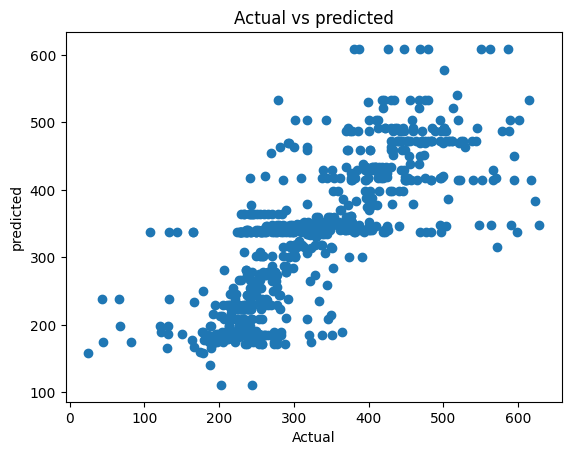

In [45]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, NB_model.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [46]:
y_prd=NB_model.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
898,259,302,-43
182,187,174,13
565,233,337,-104
457,213,230,-17
1852,601,503,98
568,243,223,20
1340,477,337,140
778,207,281,-74
562,231,224,7
716,243,265,-22


## linear regression

In [47]:
from sklearn import linear_model
lr_model=linear_model.LinearRegression()
lr_model.fit(X_train.values,Y_train.values)

LinearRegression()

In [48]:
prediction = lr_model.predict([[80,2,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [299.44311578]


In [49]:
from sklearn.metrics import r2_score
r2_score(Y_test, lr_model.predict(X_test.values))

0.7961678993079687

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, lr_model.predict(X_test.values))
mae= mean_absolute_error(Y_test, lr_model.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 2275.7561578090026
mean absolute error: 32.12700231215311


Text(0.5, 1.0, 'Actual vs predicted')

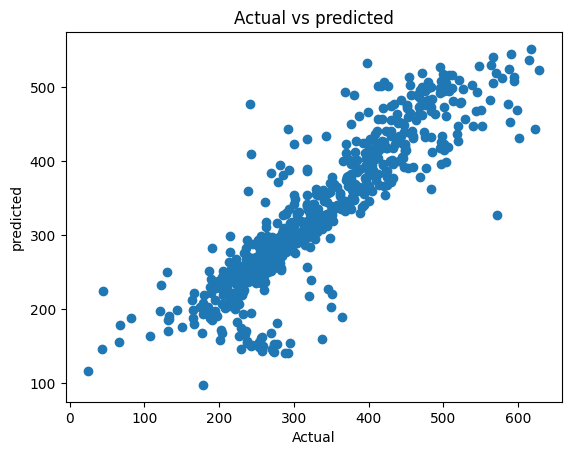

In [51]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, lr_model.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [52]:
y_prd=lr_model.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
898,259,264.588144,-5.588144
182,187,251.471535,-64.471535
565,233,245.340194,-12.340194
457,213,214.869818,-1.869818
1852,601,431.041597,169.958403
568,243,242.273591,0.726409
1340,477,390.818399,86.181601
778,207,240.331856,-33.331856
562,231,249.123458,-18.123458
716,243,261.508042,-18.508042


## Random forest

In [7]:
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(n_estimators=200,random_state=30)
RF.fit(X_train.values,Y_train.values)
prediction = RF.predict([[80,2,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [301.725]


In [71]:
from sklearn.metrics import r2_score
r2_score(Y_test, RF.predict(X_test.values))

0.8533414987197353

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, RF.predict(X_test.values))
mae= mean_absolute_error(Y_test, RF.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 1637.4211238095238
mean absolute error: 24.496680672268905


Text(0.5, 1.0, 'Actual vs predicted')

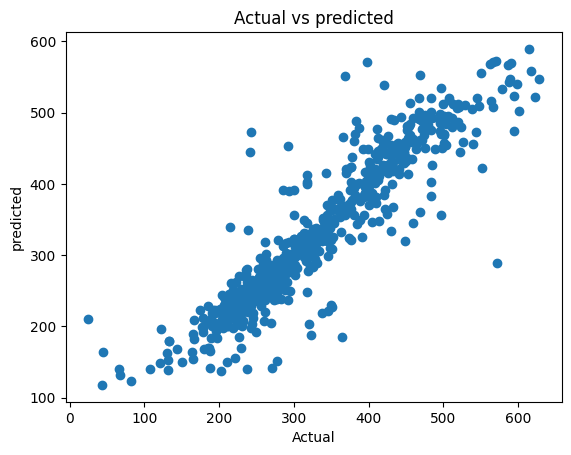

In [73]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, RF.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [74]:
y_prd=RF.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
898,259,260.975,-1.975
182,187,170.460,16.540
565,233,223.770,9.230
457,213,224.250,-11.250
1852,601,502.875,98.125
568,243,237.360,5.640
1340,477,483.805,-6.805
778,207,241.950,-34.950
562,231,228.475,2.525
716,243,252.635,-9.635


## KNN

In [75]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=30)
knn.fit(X_train.values,Y_train.values)
prediction = knn.predict([[80,2,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [295.26666667]


In [76]:
from sklearn.metrics import r2_score
r2_score(Y_test, knn.predict(X_test.values))

0.8480961454795066

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, knn.predict(X_test.values))
mae= mean_absolute_error(Y_test, knn.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 1695.9847401182699
mean absolute error: 26.643510737628386


Text(0.5, 1.0, 'Actual vs predicted')

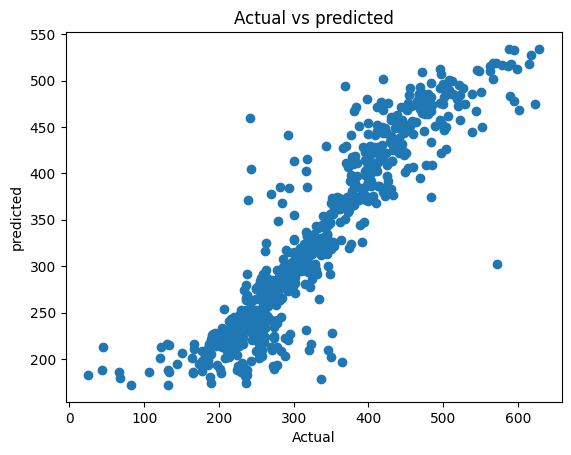

In [78]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, knn.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [79]:
y_prd=knn.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
898,259,262.466667,-3.466667
182,187,215.800000,-28.800000
565,233,229.566667,3.433333
457,213,224.566667,-11.566667
1852,601,467.766667,133.233333
568,243,228.966667,14.033333
1340,477,408.833333,68.166667
778,207,253.333333,-46.333333
562,231,231.833333,-0.833333
716,243,260.833333,-17.833333


## CNN

In [81]:
from keras.layers import Dense, Dropout,Activation, Conv1D,MaxPooling1D,Flatten
from keras.models import Sequential
model1=Sequential()
model1.add(Conv1D(64, kernel_size=1, activation='relu', name='Conv1D_1',input_shape=(X_train.shape[1],1)))
model1.add(Dropout(0.2))
model1.add(Conv1D(32, kernel_size=1, activation='relu', name='Conv1D_2'))
model1.add(Conv1D(16, kernel_size=1, activation='relu', name='Conv1D_3'))
model1.add(MaxPooling1D(pool_size=1,name="maxpooling_2"))
model1.add(Flatten())
model1.add(Dense(32, activation='linear',name='Dense_1'))
model1.add(Dense(units=1))
model1.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 4, 64)             128       
                                                                 
 dropout_1 (Dropout)         (None, 4, 64)             0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 4, 32)             2080      
                                                                 
 Conv1D_3 (Conv1D)           (None, 4, 16)             528       
                                                                 
 maxpooling_2 (MaxPooling1D)  (None, 4, 16)            0         
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 Dense_1 (Dense)             (None, 32)               

In [82]:
model1.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
37/37 [==============================] - 1s 10ms/step - loss: 65574.4922 - mae: 221.7048 - val_loss: 3031.6736 - val_mae: 41.2793
Epoch 2/2000
37/37 [==============================] - 0s 3ms/step - loss: 4418.3589 - mae: 52.1539 - val_loss: 2325.7231 - val_mae: 34.9234
Epoch 3/2000
37/37 [==============================] - 0s 3ms/step - loss: 3155.4233 - mae: 42.0177 - val_loss: 1993.9285 - val_mae: 32.0819
Epoch 4/2000
37/37 [==============================] - 0s 3ms/step - loss: 2886.1353 - mae: 39.7829 - val_loss: 1808.8392 - val_mae: 30.9026
Epoch 5/2000
37/37 [==============================] - 0s 3ms/step - loss: 2800.8103 - mae: 39.4377 - val_loss: 1784.6317 - val_mae: 30.7103
Epoch 6/2000
37/37 [==============================] - 0s 4ms/step - loss: 2734.9678 - mae: 38.9101 - val_loss: 1788.1367 - val_mae: 30.6601
Epoch 7/2000
37/37 [==============================] - 0s 4ms/step - loss: 2748.7070 - mae: 38.6546 - val_loss: 1938.3448 - val_mae: 31.2590
Epoch 8/2000
37/3

37/37 [==============================] - 0s 4ms/step - loss: 2151.7046 - mae: 32.4396 - val_loss: 3973.5498 - val_mae: 51.5018
Epoch 118/2000
37/37 [==============================] - 0s 4ms/step - loss: 2132.1887 - mae: 31.9813 - val_loss: 4938.1709 - val_mae: 59.0535
Epoch 119/2000
37/37 [==============================] - 0s 4ms/step - loss: 2104.4248 - mae: 31.7205 - val_loss: 4897.5425 - val_mae: 58.7566
Epoch 120/2000
37/37 [==============================] - 0s 4ms/step - loss: 2125.9941 - mae: 32.1280 - val_loss: 4569.8701 - val_mae: 56.2348
Epoch 121/2000
37/37 [==============================] - 0s 4ms/step - loss: 2044.5492 - mae: 31.6672 - val_loss: 4087.6711 - val_mae: 52.3861
Epoch 122/2000
37/37 [==============================] - 0s 4ms/step - loss: 2194.1726 - mae: 32.7292 - val_loss: 5434.5645 - val_mae: 62.6186
Epoch 123/2000
37/37 [==============================] - 0s 5ms/step - loss: 2147.5403 - mae: 32.0737 - val_loss: 3787.4185 - val_mae: 49.8815
Epoch 124/2000
37/37 

Epoch 175/2000
37/37 [==============================] - 0s 4ms/step - loss: 1967.0735 - mae: 31.4595 - val_loss: 4291.7231 - val_mae: 54.6416
Epoch 176/2000
37/37 [==============================] - 0s 3ms/step - loss: 1902.6643 - mae: 29.8006 - val_loss: 5688.8770 - val_mae: 64.9743
Epoch 177/2000
37/37 [==============================] - 0s 3ms/step - loss: 2007.9785 - mae: 30.7568 - val_loss: 5060.6069 - val_mae: 60.4287
Epoch 178/2000
37/37 [==============================] - 0s 4ms/step - loss: 1979.6635 - mae: 29.9391 - val_loss: 5345.2026 - val_mae: 62.4122
Epoch 179/2000
37/37 [==============================] - 0s 4ms/step - loss: 1954.4106 - mae: 29.8788 - val_loss: 5099.2344 - val_mae: 60.6094
Epoch 180/2000
37/37 [==============================] - 0s 3ms/step - loss: 1953.9264 - mae: 30.4559 - val_loss: 6291.0625 - val_mae: 68.7125
Epoch 181/2000
37/37 [==============================] - 0s 4ms/step - loss: 1900.5870 - mae: 30.0110 - val_loss: 5356.3247 - val_mae: 62.5046
Epoch 

Epoch 233/2000
37/37 [==============================] - 0s 4ms/step - loss: 1818.4281 - mae: 29.0100 - val_loss: 6276.6675 - val_mae: 68.8399
Epoch 234/2000
37/37 [==============================] - 0s 4ms/step - loss: 1799.2942 - mae: 28.8447 - val_loss: 6710.4146 - val_mae: 71.5644
Epoch 235/2000
37/37 [==============================] - 0s 4ms/step - loss: 1782.5408 - mae: 28.8423 - val_loss: 5127.8530 - val_mae: 61.1397
Epoch 236/2000
37/37 [==============================] - 0s 3ms/step - loss: 1858.5721 - mae: 29.4460 - val_loss: 6170.6401 - val_mae: 68.1617
Epoch 237/2000
37/37 [==============================] - 0s 4ms/step - loss: 1813.3207 - mae: 28.9705 - val_loss: 4699.1245 - val_mae: 57.7747
Epoch 238/2000
37/37 [==============================] - 0s 3ms/step - loss: 1855.1510 - mae: 29.4607 - val_loss: 5276.8975 - val_mae: 62.1142
Epoch 239/2000
37/37 [==============================] - 0s 5ms/step - loss: 1823.6233 - mae: 29.6333 - val_loss: 5624.0093 - val_mae: 64.5907
Epoch 

Epoch 291/2000
37/37 [==============================] - 0s 3ms/step - loss: 1901.8939 - mae: 29.0557 - val_loss: 4908.5996 - val_mae: 59.4043
Epoch 292/2000
37/37 [==============================] - 0s 3ms/step - loss: 1796.3448 - mae: 28.7690 - val_loss: 4334.0625 - val_mae: 55.1602
Epoch 293/2000
37/37 [==============================] - 0s 4ms/step - loss: 1801.4128 - mae: 29.0833 - val_loss: 5964.6343 - val_mae: 66.9670
Epoch 294/2000
37/37 [==============================] - 0s 4ms/step - loss: 1819.8789 - mae: 29.3588 - val_loss: 6825.0015 - val_mae: 72.5390
Epoch 295/2000
37/37 [==============================] - 0s 4ms/step - loss: 1824.9429 - mae: 29.5819 - val_loss: 6606.4697 - val_mae: 71.0334
Epoch 296/2000
37/37 [==============================] - 0s 4ms/step - loss: 1757.8441 - mae: 28.5249 - val_loss: 5936.0552 - val_mae: 66.7079
Epoch 297/2000
37/37 [==============================] - 0s 3ms/step - loss: 1733.2289 - mae: 28.1331 - val_loss: 6616.4448 - val_mae: 71.0137
Epoch 

Epoch 349/2000
37/37 [==============================] - 0s 3ms/step - loss: 1825.9907 - mae: 29.1471 - val_loss: 5577.9277 - val_mae: 64.2926
Epoch 350/2000
37/37 [==============================] - 0s 3ms/step - loss: 1782.8352 - mae: 28.2742 - val_loss: 6061.1460 - val_mae: 67.5615
Epoch 351/2000
37/37 [==============================] - 0s 3ms/step - loss: 1716.5789 - mae: 27.8776 - val_loss: 6873.5771 - val_mae: 72.6537
Epoch 352/2000
37/37 [==============================] - 0s 3ms/step - loss: 1850.1121 - mae: 28.7127 - val_loss: 4890.9863 - val_mae: 59.4749
Epoch 353/2000
37/37 [==============================] - 0s 3ms/step - loss: 1770.5703 - mae: 28.2176 - val_loss: 5685.6338 - val_mae: 65.1042
Epoch 354/2000
37/37 [==============================] - 0s 3ms/step - loss: 1780.6965 - mae: 28.6857 - val_loss: 5631.2925 - val_mae: 64.7307
Epoch 355/2000
37/37 [==============================] - 0s 3ms/step - loss: 1735.5020 - mae: 27.8934 - val_loss: 6115.5576 - val_mae: 68.0342
Epoch 

Epoch 407/2000
37/37 [==============================] - 0s 3ms/step - loss: 1782.2561 - mae: 28.2902 - val_loss: 6201.5923 - val_mae: 68.5437
Epoch 408/2000
37/37 [==============================] - 0s 3ms/step - loss: 1809.8956 - mae: 28.8107 - val_loss: 7256.0405 - val_mae: 75.2875
Epoch 409/2000
37/37 [==============================] - 0s 3ms/step - loss: 1818.4463 - mae: 28.8457 - val_loss: 5277.2119 - val_mae: 62.3849
Epoch 410/2000
37/37 [==============================] - 0s 3ms/step - loss: 1716.4338 - mae: 27.8431 - val_loss: 5848.8203 - val_mae: 66.4733
Epoch 411/2000
37/37 [==============================] - 0s 3ms/step - loss: 1750.7960 - mae: 28.2868 - val_loss: 6180.3374 - val_mae: 68.6112
Epoch 412/2000
37/37 [==============================] - 0s 3ms/step - loss: 1720.5919 - mae: 27.7610 - val_loss: 6667.1450 - val_mae: 71.5699
Epoch 413/2000
37/37 [==============================] - 0s 3ms/step - loss: 1763.8778 - mae: 28.2791 - val_loss: 7996.8242 - val_mae: 79.6024
Epoch 

Epoch 465/2000
37/37 [==============================] - 0s 4ms/step - loss: 1722.6787 - mae: 27.6878 - val_loss: 6553.5371 - val_mae: 71.0928
Epoch 466/2000
37/37 [==============================] - 0s 3ms/step - loss: 1765.9618 - mae: 28.0978 - val_loss: 7511.9834 - val_mae: 76.8355
Epoch 467/2000
37/37 [==============================] - 0s 4ms/step - loss: 1736.8995 - mae: 27.5737 - val_loss: 5571.0405 - val_mae: 64.5441
Epoch 468/2000
37/37 [==============================] - 0s 4ms/step - loss: 1759.0101 - mae: 28.0011 - val_loss: 7915.0234 - val_mae: 79.1969
Epoch 469/2000
37/37 [==============================] - 0s 3ms/step - loss: 1724.6814 - mae: 27.6536 - val_loss: 6889.4868 - val_mae: 73.2047
Epoch 470/2000
37/37 [==============================] - 0s 3ms/step - loss: 1723.9253 - mae: 28.0192 - val_loss: 6472.8687 - val_mae: 70.4840
Epoch 471/2000
37/37 [==============================] - 0s 4ms/step - loss: 1747.2916 - mae: 28.3143 - val_loss: 6714.9678 - val_mae: 72.1986
Epoch 

Epoch 523/2000
37/37 [==============================] - 0s 4ms/step - loss: 1661.7576 - mae: 26.8741 - val_loss: 6750.5034 - val_mae: 72.6305
Epoch 524/2000
37/37 [==============================] - 0s 3ms/step - loss: 1696.5358 - mae: 27.3442 - val_loss: 6697.6567 - val_mae: 72.3960
Epoch 525/2000
37/37 [==============================] - 0s 3ms/step - loss: 1827.1488 - mae: 28.6331 - val_loss: 7080.9736 - val_mae: 74.6262
Epoch 526/2000
37/37 [==============================] - 0s 4ms/step - loss: 1700.0972 - mae: 27.4058 - val_loss: 8162.5195 - val_mae: 80.7745
Epoch 527/2000
37/37 [==============================] - 0s 3ms/step - loss: 1716.0016 - mae: 27.7603 - val_loss: 6638.6616 - val_mae: 71.8593
Epoch 528/2000
37/37 [==============================] - 0s 4ms/step - loss: 1780.5031 - mae: 27.7812 - val_loss: 7344.7012 - val_mae: 76.1644
Epoch 529/2000
37/37 [==============================] - 0s 3ms/step - loss: 1726.5283 - mae: 27.9619 - val_loss: 6145.8906 - val_mae: 68.7141
Epoch 

Epoch 581/2000
37/37 [==============================] - 0s 4ms/step - loss: 1710.0679 - mae: 27.6484 - val_loss: 7774.2236 - val_mae: 78.6685
Epoch 582/2000
37/37 [==============================] - 0s 4ms/step - loss: 1689.9186 - mae: 27.2634 - val_loss: 8661.1211 - val_mae: 83.5791
Epoch 583/2000
37/37 [==============================] - 0s 4ms/step - loss: 1697.2227 - mae: 27.6134 - val_loss: 7419.4814 - val_mae: 76.6876
Epoch 584/2000
37/37 [==============================] - 0s 4ms/step - loss: 1700.5806 - mae: 27.4567 - val_loss: 5168.4575 - val_mae: 62.0949
Epoch 585/2000
37/37 [==============================] - 0s 4ms/step - loss: 1709.4398 - mae: 27.5187 - val_loss: 7812.7358 - val_mae: 78.8822
Epoch 586/2000
37/37 [==============================] - 0s 4ms/step - loss: 1729.8885 - mae: 27.8212 - val_loss: 8877.1914 - val_mae: 84.8547
Epoch 587/2000
37/37 [==============================] - 0s 4ms/step - loss: 1715.8605 - mae: 27.6419 - val_loss: 8404.2344 - val_mae: 82.2508
Epoch 

Epoch 639/2000
37/37 [==============================] - 0s 4ms/step - loss: 1702.4817 - mae: 27.7069 - val_loss: 6537.1782 - val_mae: 71.3866
Epoch 640/2000
37/37 [==============================] - 0s 4ms/step - loss: 1718.0209 - mae: 27.7284 - val_loss: 7419.7412 - val_mae: 76.8070
Epoch 641/2000
37/37 [==============================] - 0s 4ms/step - loss: 1672.4307 - mae: 26.9294 - val_loss: 7440.0449 - val_mae: 76.7717
Epoch 642/2000
37/37 [==============================] - 0s 4ms/step - loss: 1667.4271 - mae: 26.7794 - val_loss: 6505.9775 - val_mae: 71.1179
Epoch 643/2000
37/37 [==============================] - 0s 4ms/step - loss: 1702.7308 - mae: 27.3711 - val_loss: 8509.3350 - val_mae: 83.0282
Epoch 644/2000
37/37 [==============================] - 0s 4ms/step - loss: 1748.5027 - mae: 28.2599 - val_loss: 6506.9443 - val_mae: 71.1672
Epoch 645/2000
37/37 [==============================] - 0s 4ms/step - loss: 1679.4913 - mae: 26.7957 - val_loss: 6177.6206 - val_mae: 69.0480
Epoch 

Epoch 697/2000
37/37 [==============================] - 0s 4ms/step - loss: 1733.1893 - mae: 27.6866 - val_loss: 6897.3994 - val_mae: 73.4147
Epoch 698/2000
37/37 [==============================] - 0s 4ms/step - loss: 1669.4319 - mae: 26.9308 - val_loss: 7354.9556 - val_mae: 76.2624
Epoch 699/2000
37/37 [==============================] - 0s 4ms/step - loss: 1677.1332 - mae: 27.2549 - val_loss: 7292.5103 - val_mae: 75.9390
Epoch 700/2000
37/37 [==============================] - 0s 4ms/step - loss: 1721.9987 - mae: 27.4042 - val_loss: 7299.6484 - val_mae: 76.0820
Epoch 701/2000
37/37 [==============================] - 0s 4ms/step - loss: 1668.3174 - mae: 27.3728 - val_loss: 7318.5894 - val_mae: 76.2024
Epoch 702/2000
37/37 [==============================] - 0s 4ms/step - loss: 1712.6678 - mae: 27.2830 - val_loss: 7316.7949 - val_mae: 76.2149
Epoch 703/2000
37/37 [==============================] - 0s 4ms/step - loss: 1677.4972 - mae: 27.3632 - val_loss: 8323.7900 - val_mae: 81.8812
Epoch 

Epoch 755/2000
37/37 [==============================] - 0s 4ms/step - loss: 1719.5013 - mae: 27.4615 - val_loss: 6968.0635 - val_mae: 74.0719
Epoch 756/2000
37/37 [==============================] - 0s 4ms/step - loss: 1670.7451 - mae: 27.1731 - val_loss: 7358.3389 - val_mae: 76.4173
Epoch 757/2000
37/37 [==============================] - 0s 4ms/step - loss: 1698.3236 - mae: 27.4229 - val_loss: 7401.6499 - val_mae: 76.5762
Epoch 758/2000
37/37 [==============================] - 0s 4ms/step - loss: 1747.4600 - mae: 27.9233 - val_loss: 6417.7666 - val_mae: 70.7277
Epoch 759/2000
37/37 [==============================] - 0s 4ms/step - loss: 1711.3690 - mae: 27.4036 - val_loss: 6188.0464 - val_mae: 69.2314
Epoch 760/2000
37/37 [==============================] - 0s 4ms/step - loss: 1663.7581 - mae: 27.1876 - val_loss: 6992.8887 - val_mae: 74.1562
Epoch 761/2000
37/37 [==============================] - 0s 4ms/step - loss: 1665.3788 - mae: 26.8991 - val_loss: 7422.4355 - val_mae: 76.7299
Epoch 

Epoch 813/2000
37/37 [==============================] - 0s 5ms/step - loss: 1683.8544 - mae: 27.0441 - val_loss: 7038.4834 - val_mae: 74.4799
Epoch 814/2000
37/37 [==============================] - 0s 4ms/step - loss: 1661.1425 - mae: 26.8429 - val_loss: 8441.8301 - val_mae: 82.5912
Epoch 815/2000
37/37 [==============================] - 0s 4ms/step - loss: 1762.3196 - mae: 27.6970 - val_loss: 6626.8828 - val_mae: 71.8559
Epoch 816/2000
37/37 [==============================] - 0s 4ms/step - loss: 1654.8517 - mae: 26.8152 - val_loss: 7451.0522 - val_mae: 76.8792
Epoch 817/2000
37/37 [==============================] - 0s 4ms/step - loss: 1691.1371 - mae: 27.1483 - val_loss: 6995.3081 - val_mae: 74.1959
Epoch 818/2000
37/37 [==============================] - 0s 4ms/step - loss: 1707.0925 - mae: 27.2203 - val_loss: 7632.6465 - val_mae: 78.1067
Epoch 819/2000
37/37 [==============================] - 0s 4ms/step - loss: 1731.3754 - mae: 26.9496 - val_loss: 5581.9248 - val_mae: 65.1666
Epoch 

Epoch 871/2000
37/37 [==============================] - 0s 4ms/step - loss: 1673.0603 - mae: 27.1689 - val_loss: 5677.2002 - val_mae: 65.7834
Epoch 872/2000
37/37 [==============================] - 0s 4ms/step - loss: 1696.5372 - mae: 27.5474 - val_loss: 6770.7271 - val_mae: 72.8669
Epoch 873/2000
37/37 [==============================] - 0s 4ms/step - loss: 1694.9865 - mae: 27.3489 - val_loss: 6549.4395 - val_mae: 71.4236
Epoch 874/2000
37/37 [==============================] - 0s 4ms/step - loss: 1674.3131 - mae: 26.9572 - val_loss: 6465.2710 - val_mae: 70.9247
Epoch 875/2000
37/37 [==============================] - 0s 4ms/step - loss: 1668.4513 - mae: 26.7276 - val_loss: 6531.3843 - val_mae: 71.4273
Epoch 876/2000
37/37 [==============================] - 0s 3ms/step - loss: 1788.6946 - mae: 28.5000 - val_loss: 5325.5527 - val_mae: 63.3445
Epoch 877/2000
37/37 [==============================] - 0s 4ms/step - loss: 1703.4851 - mae: 27.4115 - val_loss: 5406.4917 - val_mae: 63.9579
Epoch 

Epoch 929/2000
37/37 [==============================] - 0s 4ms/step - loss: 1696.1362 - mae: 27.0969 - val_loss: 6802.4497 - val_mae: 72.9641
Epoch 930/2000
37/37 [==============================] - 0s 4ms/step - loss: 1688.9381 - mae: 26.9556 - val_loss: 6478.9336 - val_mae: 70.9262
Epoch 931/2000
37/37 [==============================] - 0s 4ms/step - loss: 1716.4557 - mae: 27.3615 - val_loss: 6480.6543 - val_mae: 71.0905
Epoch 932/2000
37/37 [==============================] - 0s 4ms/step - loss: 1672.1940 - mae: 26.9717 - val_loss: 6691.3579 - val_mae: 72.3850
Epoch 933/2000
37/37 [==============================] - 0s 4ms/step - loss: 1669.5460 - mae: 26.9021 - val_loss: 8249.9121 - val_mae: 81.5049
Epoch 934/2000
37/37 [==============================] - 0s 4ms/step - loss: 1686.4915 - mae: 26.9269 - val_loss: 6274.8711 - val_mae: 69.7344
Epoch 935/2000
37/37 [==============================] - 0s 3ms/step - loss: 1667.8853 - mae: 26.9202 - val_loss: 6816.6040 - val_mae: 73.1069
Epoch 

Epoch 987/2000
37/37 [==============================] - 0s 4ms/step - loss: 1681.8965 - mae: 27.0454 - val_loss: 6343.1182 - val_mae: 70.1787
Epoch 988/2000
37/37 [==============================] - 0s 4ms/step - loss: 1723.5653 - mae: 27.3069 - val_loss: 8365.0137 - val_mae: 82.0391
Epoch 989/2000
37/37 [==============================] - 0s 4ms/step - loss: 1664.8369 - mae: 26.7570 - val_loss: 7361.6201 - val_mae: 76.3838
Epoch 990/2000
37/37 [==============================] - 0s 4ms/step - loss: 1705.7231 - mae: 27.1431 - val_loss: 7100.6953 - val_mae: 74.8298
Epoch 991/2000
37/37 [==============================] - 0s 5ms/step - loss: 1665.0629 - mae: 26.7922 - val_loss: 7232.7773 - val_mae: 75.6208
Epoch 992/2000
37/37 [==============================] - 0s 5ms/step - loss: 1678.0752 - mae: 26.8542 - val_loss: 6924.8198 - val_mae: 73.7428
Epoch 993/2000
37/37 [==============================] - 0s 5ms/step - loss: 1668.3625 - mae: 26.9835 - val_loss: 7054.5645 - val_mae: 74.6541
Epoch 

37/37 [==============================] - 0s 4ms/step - loss: 1687.3524 - mae: 27.0687 - val_loss: 6311.4492 - val_mae: 69.9256
Epoch 1102/2000
37/37 [==============================] - 0s 5ms/step - loss: 1698.0520 - mae: 27.4175 - val_loss: 5157.1885 - val_mae: 62.0682
Epoch 1103/2000
37/37 [==============================] - 0s 5ms/step - loss: 1695.6353 - mae: 27.5492 - val_loss: 6938.5898 - val_mae: 73.7898
Epoch 1104/2000
37/37 [==============================] - 0s 4ms/step - loss: 1652.5652 - mae: 26.7618 - val_loss: 6743.6030 - val_mae: 72.7213
Epoch 1105/2000
37/37 [==============================] - 0s 5ms/step - loss: 1699.4031 - mae: 27.8273 - val_loss: 7427.1509 - val_mae: 76.8052
Epoch 1106/2000
37/37 [==============================] - 0s 4ms/step - loss: 1661.8113 - mae: 26.7938 - val_loss: 7609.7510 - val_mae: 77.8796
Epoch 1107/2000
37/37 [==============================] - 0s 4ms/step - loss: 1629.8936 - mae: 26.4890 - val_loss: 7534.3979 - val_mae: 77.4300
Epoch 1108/2000

37/37 [==============================] - 0s 3ms/step - loss: 1665.2565 - mae: 27.0778 - val_loss: 6896.5093 - val_mae: 73.5499
Epoch 1216/2000
37/37 [==============================] - 0s 3ms/step - loss: 1659.8054 - mae: 26.7224 - val_loss: 6580.7363 - val_mae: 71.6506
Epoch 1217/2000
37/37 [==============================] - 0s 3ms/step - loss: 1651.1122 - mae: 26.6936 - val_loss: 6698.7178 - val_mae: 72.4405
Epoch 1218/2000
37/37 [==============================] - 0s 3ms/step - loss: 1659.3752 - mae: 26.7230 - val_loss: 7399.2310 - val_mae: 76.6234
Epoch 1219/2000
37/37 [==============================] - 0s 3ms/step - loss: 1653.8170 - mae: 26.8991 - val_loss: 6786.3066 - val_mae: 72.9845
Epoch 1220/2000
37/37 [==============================] - 0s 3ms/step - loss: 1671.1517 - mae: 27.2088 - val_loss: 6096.6582 - val_mae: 68.4988
Epoch 1221/2000
37/37 [==============================] - 0s 3ms/step - loss: 1665.6045 - mae: 27.0266 - val_loss: 8231.6680 - val_mae: 81.4072
Epoch 1222/2000

37/37 [==============================] - 0s 3ms/step - loss: 1661.5272 - mae: 26.7266 - val_loss: 8541.2656 - val_mae: 83.0732
Epoch 1330/2000
37/37 [==============================] - 0s 3ms/step - loss: 1714.7212 - mae: 27.4888 - val_loss: 6613.0815 - val_mae: 71.7854
Epoch 1331/2000
37/37 [==============================] - 0s 3ms/step - loss: 1645.5413 - mae: 26.7563 - val_loss: 6858.2769 - val_mae: 73.2978
Epoch 1332/2000
37/37 [==============================] - 0s 3ms/step - loss: 1643.3531 - mae: 26.7601 - val_loss: 6951.8667 - val_mae: 73.9499
Epoch 1333/2000
37/37 [==============================] - 0s 3ms/step - loss: 1679.6326 - mae: 26.8690 - val_loss: 6489.0200 - val_mae: 71.0880
Epoch 1334/2000
37/37 [==============================] - 0s 3ms/step - loss: 1638.6866 - mae: 26.8218 - val_loss: 5641.3608 - val_mae: 65.5281
Epoch 1335/2000
37/37 [==============================] - 0s 3ms/step - loss: 1668.9277 - mae: 27.0085 - val_loss: 7987.0605 - val_mae: 79.9854
Epoch 1336/2000

37/37 [==============================] - 0s 5ms/step - loss: 1648.3132 - mae: 26.8802 - val_loss: 6704.5073 - val_mae: 72.4523
Epoch 1444/2000
37/37 [==============================] - 0s 4ms/step - loss: 1661.3860 - mae: 26.7159 - val_loss: 6612.0347 - val_mae: 71.7569
Epoch 1445/2000
37/37 [==============================] - 0s 5ms/step - loss: 1679.6969 - mae: 27.0376 - val_loss: 6944.8936 - val_mae: 73.9587
Epoch 1446/2000
37/37 [==============================] - 0s 5ms/step - loss: 1663.0248 - mae: 26.8898 - val_loss: 7759.7993 - val_mae: 78.6560
Epoch 1447/2000
37/37 [==============================] - 0s 4ms/step - loss: 1666.2999 - mae: 27.4047 - val_loss: 5681.2388 - val_mae: 65.8028
Epoch 1448/2000
37/37 [==============================] - 0s 4ms/step - loss: 1742.5162 - mae: 27.9161 - val_loss: 7068.7266 - val_mae: 74.7059
Epoch 1449/2000
37/37 [==============================] - 0s 4ms/step - loss: 1646.3403 - mae: 26.9516 - val_loss: 8206.3555 - val_mae: 81.1720
Epoch 1450/2000

37/37 [==============================] - 0s 4ms/step - loss: 1661.0286 - mae: 26.8639 - val_loss: 7097.2437 - val_mae: 74.8835
Epoch 1558/2000
37/37 [==============================] - 0s 5ms/step - loss: 1647.3143 - mae: 26.9560 - val_loss: 6289.9189 - val_mae: 69.8095
Epoch 1559/2000
37/37 [==============================] - 0s 4ms/step - loss: 1620.6007 - mae: 26.4858 - val_loss: 6551.6558 - val_mae: 71.5582
Epoch 1560/2000
37/37 [==============================] - 0s 4ms/step - loss: 1678.9126 - mae: 27.1692 - val_loss: 6839.5156 - val_mae: 73.2309
Epoch 1561/2000
37/37 [==============================] - 0s 4ms/step - loss: 1670.1770 - mae: 27.0933 - val_loss: 6418.3154 - val_mae: 70.6086
Epoch 1562/2000
37/37 [==============================] - 0s 4ms/step - loss: 1687.2494 - mae: 27.2851 - val_loss: 7220.3896 - val_mae: 75.5833
Epoch 1563/2000
37/37 [==============================] - 0s 4ms/step - loss: 1657.2766 - mae: 26.8142 - val_loss: 7660.7314 - val_mae: 78.2088
Epoch 1564/2000

37/37 [==============================] - 0s 4ms/step - loss: 1668.5177 - mae: 27.1186 - val_loss: 7025.3726 - val_mae: 74.4131
Epoch 1672/2000
37/37 [==============================] - 0s 4ms/step - loss: 1650.6340 - mae: 26.6310 - val_loss: 6256.1006 - val_mae: 69.6088
Epoch 1673/2000
37/37 [==============================] - 0s 4ms/step - loss: 1666.5720 - mae: 26.6100 - val_loss: 7635.9800 - val_mae: 78.0596
Epoch 1674/2000
37/37 [==============================] - 0s 4ms/step - loss: 1680.1853 - mae: 27.2076 - val_loss: 6850.7593 - val_mae: 73.3340
Epoch 1675/2000
37/37 [==============================] - 0s 4ms/step - loss: 1660.5027 - mae: 26.8819 - val_loss: 7798.6650 - val_mae: 78.8929
Epoch 1676/2000
37/37 [==============================] - 0s 3ms/step - loss: 1683.7928 - mae: 27.0972 - val_loss: 5202.6084 - val_mae: 62.5154
Epoch 1677/2000
37/37 [==============================] - 0s 3ms/step - loss: 1714.4324 - mae: 27.6727 - val_loss: 6091.4980 - val_mae: 68.5356
Epoch 1678/2000

37/37 [==============================] - 0s 4ms/step - loss: 1675.0490 - mae: 27.1653 - val_loss: 8424.5469 - val_mae: 82.4149
Epoch 1786/2000
37/37 [==============================] - 0s 4ms/step - loss: 1739.4457 - mae: 27.3454 - val_loss: 7130.5503 - val_mae: 75.0288
Epoch 1787/2000
37/37 [==============================] - 0s 4ms/step - loss: 1640.5006 - mae: 26.7695 - val_loss: 6923.1519 - val_mae: 73.7890
Epoch 1788/2000
37/37 [==============================] - 0s 4ms/step - loss: 1696.0721 - mae: 27.2786 - val_loss: 6331.4116 - val_mae: 70.1034
Epoch 1789/2000
37/37 [==============================] - 0s 4ms/step - loss: 1655.6804 - mae: 26.9911 - val_loss: 7270.4731 - val_mae: 75.8400
Epoch 1790/2000
37/37 [==============================] - 0s 4ms/step - loss: 1644.5454 - mae: 26.8020 - val_loss: 6127.3296 - val_mae: 68.7378
Epoch 1791/2000
37/37 [==============================] - 0s 4ms/step - loss: 1656.4637 - mae: 26.6964 - val_loss: 6275.7847 - val_mae: 69.7514
Epoch 1792/2000

37/37 [==============================] - 0s 3ms/step - loss: 1643.7992 - mae: 26.8554 - val_loss: 6366.1143 - val_mae: 70.2928
Epoch 1900/2000
37/37 [==============================] - 0s 3ms/step - loss: 1702.0585 - mae: 27.1296 - val_loss: 6985.6519 - val_mae: 74.1757
Epoch 1901/2000
37/37 [==============================] - 0s 3ms/step - loss: 1672.6117 - mae: 26.8628 - val_loss: 7486.7920 - val_mae: 77.1541
Epoch 1902/2000
37/37 [==============================] - 0s 4ms/step - loss: 1641.7880 - mae: 26.7076 - val_loss: 7431.6167 - val_mae: 76.8792
Epoch 1903/2000
37/37 [==============================] - 0s 4ms/step - loss: 1653.5033 - mae: 26.8964 - val_loss: 6367.0635 - val_mae: 70.4105
Epoch 1904/2000
37/37 [==============================] - 0s 4ms/step - loss: 1635.2186 - mae: 26.4966 - val_loss: 7365.0381 - val_mae: 76.4556
Epoch 1905/2000
37/37 [==============================] - 0s 3ms/step - loss: 1658.2030 - mae: 26.7598 - val_loss: 7506.0938 - val_mae: 77.2454
Epoch 1906/2000

In [83]:
import numpy as np
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model1.predict(X_test)) )

23/23 [==============================] - 0s 2ms/step


0.4102039219244823

In [84]:
prediction =np.squeeze(model1.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 0s 131ms/step
Prediction: 220.34378051757812


In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model1.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model1.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

23/23 [==============================] - 0s 2ms/step
mean squired error: 6584.988586071284
mean absolute error: 70.19279742841961


23/23 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Actual vs predicted')

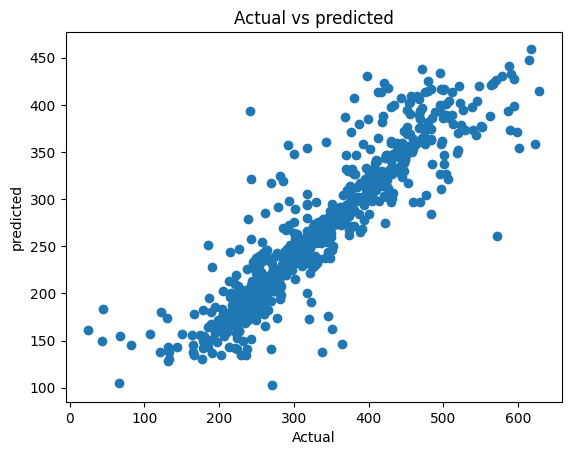

In [86]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model1.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [87]:
y_prd=np.squeeze(np.squeeze(model1.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

23/23 [==============================] - 0s 1ms/step


,Actual,predict,differences
898,259,211.691727,47.308273
182,187,194.697556,-7.697556
565,233,184.095566,48.904434
457,213,169.125717,43.874283
1852,601,354.594604,246.405396
568,243,197.589005,45.410995
1340,477,304.139221,172.860779
778,207,171.244217,35.755783
562,231,177.329407,53.670593
716,243,186.895889,56.104111


## NN with dense layer

In [90]:
from keras.layers import Dense, Dropout,Activation
from keras.models import Sequential
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor
model2=Sequential()
model2.add(Dense(128, input_dim=4, activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(1,activation='linear'))
model2.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               640       
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [91]:
model2.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
37/37 [==============================] - 1s 7ms/step - loss: 58110.4688 - mae: 212.3294 - val_loss: 9420.1182 - val_mae: 80.8816
Epoch 2/2000
37/37 [==============================] - 0s 3ms/step - loss: 4483.8423 - mae: 49.5656 - val_loss: 2287.8477 - val_mae: 33.7131
Epoch 3/2000
37/37 [==============================] - 0s 3ms/step - loss: 2237.5303 - mae: 33.5745 - val_loss: 1767.9982 - val_mae: 30.6801
Epoch 4/2000
37/37 [==============================] - 0s 3ms/step - loss: 1981.3003 - mae: 31.1619 - val_loss: 1749.3743 - val_mae: 30.2443
Epoch 5/2000
37/37 [==============================] - 0s 3ms/step - loss: 1956.4630 - mae: 30.7067 - val_loss: 1714.8280 - val_mae: 30.3149
Epoch 6/2000
37/37 [==============================] - 0s 3ms/step - loss: 1923.4807 - mae: 30.7201 - val_loss: 1698.7498 - val_mae: 29.9667
Epoch 7/2000
37/37 [==============================] - 0s 3ms/step - loss: 1914.6671 - mae: 30.5641 - val_loss: 1689.3473 - val_mae: 29.9172
Epoch 8/2000
37/37

37/37 [==============================] - 0s 3ms/step - loss: 1488.6714 - mae: 26.5936 - val_loss: 1578.6613 - val_mae: 27.4262
Epoch 118/2000
37/37 [==============================] - 0s 3ms/step - loss: 1474.2474 - mae: 26.2063 - val_loss: 1531.2628 - val_mae: 27.1164
Epoch 119/2000
37/37 [==============================] - 0s 3ms/step - loss: 1478.2194 - mae: 26.0748 - val_loss: 1555.6709 - val_mae: 27.1159
Epoch 120/2000
37/37 [==============================] - 0s 3ms/step - loss: 1441.3054 - mae: 25.8569 - val_loss: 1485.0155 - val_mae: 27.1961
Epoch 121/2000
37/37 [==============================] - 0s 3ms/step - loss: 1468.6770 - mae: 26.3748 - val_loss: 1635.4011 - val_mae: 29.7216
Epoch 122/2000
37/37 [==============================] - 0s 3ms/step - loss: 1493.5376 - mae: 26.4169 - val_loss: 1492.1085 - val_mae: 26.9044
Epoch 123/2000
37/37 [==============================] - 0s 3ms/step - loss: 1507.7478 - mae: 26.6555 - val_loss: 1473.3368 - val_mae: 27.0444
Epoch 124/2000
37/37 

Epoch 175/2000
37/37 [==============================] - 0s 3ms/step - loss: 1478.0358 - mae: 26.2909 - val_loss: 1517.0970 - val_mae: 27.0400
Epoch 176/2000
37/37 [==============================] - 0s 3ms/step - loss: 1480.6039 - mae: 26.0561 - val_loss: 1493.8832 - val_mae: 26.9872
Epoch 177/2000
37/37 [==============================] - 0s 3ms/step - loss: 1446.7284 - mae: 25.5722 - val_loss: 1586.9148 - val_mae: 26.9836
Epoch 178/2000
37/37 [==============================] - 0s 3ms/step - loss: 1520.7587 - mae: 26.7651 - val_loss: 1477.5798 - val_mae: 26.6110
Epoch 179/2000
37/37 [==============================] - 0s 3ms/step - loss: 1587.1335 - mae: 27.9563 - val_loss: 1474.9310 - val_mae: 26.8845
Epoch 180/2000
37/37 [==============================] - 0s 3ms/step - loss: 1471.3051 - mae: 26.1735 - val_loss: 1519.8770 - val_mae: 27.9114
Epoch 181/2000
37/37 [==============================] - 0s 3ms/step - loss: 1448.8414 - mae: 25.7013 - val_loss: 1590.1376 - val_mae: 29.3925
Epoch 

Epoch 233/2000
37/37 [==============================] - 0s 3ms/step - loss: 1411.3790 - mae: 25.1519 - val_loss: 1475.0184 - val_mae: 26.5758
Epoch 234/2000
37/37 [==============================] - 0s 3ms/step - loss: 1425.3441 - mae: 25.5446 - val_loss: 1514.6017 - val_mae: 27.9614
Epoch 235/2000
37/37 [==============================] - 0s 3ms/step - loss: 1430.8735 - mae: 25.4820 - val_loss: 1491.1742 - val_mae: 26.9229
Epoch 236/2000
37/37 [==============================] - 0s 3ms/step - loss: 1431.4513 - mae: 25.4318 - val_loss: 1481.7161 - val_mae: 27.2512
Epoch 237/2000
37/37 [==============================] - 0s 3ms/step - loss: 1424.7214 - mae: 25.4354 - val_loss: 1498.3669 - val_mae: 27.0276
Epoch 238/2000
37/37 [==============================] - 0s 3ms/step - loss: 1451.6969 - mae: 25.7223 - val_loss: 1487.8818 - val_mae: 26.9904
Epoch 239/2000
37/37 [==============================] - 0s 4ms/step - loss: 1437.9255 - mae: 25.7417 - val_loss: 1509.1664 - val_mae: 27.9546
Epoch 

Epoch 291/2000
37/37 [==============================] - 0s 3ms/step - loss: 1415.7095 - mae: 25.0216 - val_loss: 1537.4515 - val_mae: 28.3344
Epoch 292/2000
37/37 [==============================] - 0s 3ms/step - loss: 1449.9249 - mae: 25.9735 - val_loss: 1468.9105 - val_mae: 26.3810
Epoch 293/2000
37/37 [==============================] - 0s 3ms/step - loss: 1494.9978 - mae: 26.7251 - val_loss: 1493.2275 - val_mae: 27.4055
Epoch 294/2000
37/37 [==============================] - 0s 3ms/step - loss: 1420.2872 - mae: 25.7299 - val_loss: 1493.5948 - val_mae: 26.7620
Epoch 295/2000
37/37 [==============================] - 0s 3ms/step - loss: 1416.5876 - mae: 25.1838 - val_loss: 1495.0302 - val_mae: 27.5162
Epoch 296/2000
37/37 [==============================] - 0s 3ms/step - loss: 1472.7188 - mae: 25.9246 - val_loss: 1469.6620 - val_mae: 26.8652
Epoch 297/2000
37/37 [==============================] - 0s 3ms/step - loss: 1399.7910 - mae: 25.0520 - val_loss: 1612.5782 - val_mae: 29.4205
Epoch 

Epoch 349/2000
37/37 [==============================] - 0s 3ms/step - loss: 1433.2349 - mae: 25.5087 - val_loss: 1494.7462 - val_mae: 27.6132
Epoch 350/2000
37/37 [==============================] - 0s 2ms/step - loss: 1395.4001 - mae: 24.9652 - val_loss: 1906.4069 - val_mae: 33.8352
Epoch 351/2000
37/37 [==============================] - 0s 3ms/step - loss: 1502.9886 - mae: 26.5113 - val_loss: 1454.5869 - val_mae: 26.3264
Epoch 352/2000
37/37 [==============================] - 0s 2ms/step - loss: 1442.6288 - mae: 25.4343 - val_loss: 1456.5385 - val_mae: 26.5409
Epoch 353/2000
37/37 [==============================] - 0s 3ms/step - loss: 1494.9301 - mae: 26.5714 - val_loss: 1504.3243 - val_mae: 27.7562
Epoch 354/2000
37/37 [==============================] - 0s 3ms/step - loss: 1420.1207 - mae: 25.7690 - val_loss: 1460.4926 - val_mae: 26.8436
Epoch 355/2000
37/37 [==============================] - 0s 3ms/step - loss: 1402.5709 - mae: 25.2478 - val_loss: 1554.4182 - val_mae: 27.4950
Epoch 

Epoch 407/2000
37/37 [==============================] - 0s 3ms/step - loss: 1385.8119 - mae: 24.8747 - val_loss: 1493.9264 - val_mae: 26.4755
Epoch 408/2000
37/37 [==============================] - 0s 3ms/step - loss: 1393.7213 - mae: 25.0850 - val_loss: 1501.6138 - val_mae: 27.1921
Epoch 409/2000
37/37 [==============================] - 0s 3ms/step - loss: 1393.1460 - mae: 25.1376 - val_loss: 1466.9171 - val_mae: 27.0112
Epoch 410/2000
37/37 [==============================] - 0s 3ms/step - loss: 1376.7712 - mae: 24.7429 - val_loss: 1480.8120 - val_mae: 27.3534
Epoch 411/2000
37/37 [==============================] - 0s 3ms/step - loss: 1398.9934 - mae: 25.4322 - val_loss: 1455.2056 - val_mae: 26.7214
Epoch 412/2000
37/37 [==============================] - 0s 3ms/step - loss: 1390.2472 - mae: 25.0418 - val_loss: 1612.5654 - val_mae: 29.5891
Epoch 413/2000
37/37 [==============================] - 0s 3ms/step - loss: 1409.9415 - mae: 25.5958 - val_loss: 1447.4396 - val_mae: 26.2617
Epoch 

Epoch 465/2000
37/37 [==============================] - 0s 3ms/step - loss: 1394.2308 - mae: 25.3126 - val_loss: 1441.7596 - val_mae: 26.3281
Epoch 466/2000
37/37 [==============================] - 0s 5ms/step - loss: 1368.3340 - mae: 25.0254 - val_loss: 1485.7361 - val_mae: 26.1664
Epoch 467/2000
37/37 [==============================] - 0s 4ms/step - loss: 1365.2290 - mae: 24.6513 - val_loss: 1470.2349 - val_mae: 27.1353
Epoch 468/2000
37/37 [==============================] - 0s 4ms/step - loss: 1356.9674 - mae: 24.4848 - val_loss: 1440.9821 - val_mae: 26.4010
Epoch 469/2000
37/37 [==============================] - 0s 5ms/step - loss: 1366.6176 - mae: 24.6230 - val_loss: 1450.5594 - val_mae: 26.4502
Epoch 470/2000
37/37 [==============================] - 0s 4ms/step - loss: 1412.2876 - mae: 25.7291 - val_loss: 1461.4902 - val_mae: 25.9421
Epoch 471/2000
37/37 [==============================] - 0s 3ms/step - loss: 1393.7000 - mae: 24.9987 - val_loss: 1444.5509 - val_mae: 26.4219
Epoch 

Epoch 523/2000
37/37 [==============================] - 0s 3ms/step - loss: 1382.3004 - mae: 25.0565 - val_loss: 1492.3375 - val_mae: 27.5154
Epoch 524/2000
37/37 [==============================] - 0s 3ms/step - loss: 1373.5946 - mae: 24.9784 - val_loss: 1628.4680 - val_mae: 29.7668
Epoch 525/2000
37/37 [==============================] - 0s 3ms/step - loss: 1385.7150 - mae: 24.8658 - val_loss: 1483.4895 - val_mae: 27.5469
Epoch 526/2000
37/37 [==============================] - 0s 3ms/step - loss: 1399.9894 - mae: 25.4163 - val_loss: 1640.1613 - val_mae: 29.8637
Epoch 527/2000
37/37 [==============================] - 0s 3ms/step - loss: 1394.9568 - mae: 25.3984 - val_loss: 1497.4174 - val_mae: 27.5913
Epoch 528/2000
37/37 [==============================] - 0s 3ms/step - loss: 1398.3364 - mae: 24.8698 - val_loss: 1431.1912 - val_mae: 26.0980
Epoch 529/2000
37/37 [==============================] - 0s 3ms/step - loss: 1378.4572 - mae: 25.0859 - val_loss: 1448.0699 - val_mae: 26.1717
Epoch 

Epoch 581/2000
37/37 [==============================] - 0s 3ms/step - loss: 1360.8082 - mae: 24.5653 - val_loss: 1467.0305 - val_mae: 27.1249
Epoch 582/2000
37/37 [==============================] - 0s 3ms/step - loss: 1364.8610 - mae: 24.7492 - val_loss: 1487.4114 - val_mae: 27.5525
Epoch 583/2000
37/37 [==============================] - 0s 3ms/step - loss: 1373.5841 - mae: 24.9527 - val_loss: 1464.1699 - val_mae: 27.0248
Epoch 584/2000
37/37 [==============================] - 0s 3ms/step - loss: 1336.6692 - mae: 24.6855 - val_loss: 1438.7032 - val_mae: 26.3071
Epoch 585/2000
37/37 [==============================] - 0s 3ms/step - loss: 1398.4897 - mae: 25.3363 - val_loss: 1567.7832 - val_mae: 27.5789
Epoch 586/2000
37/37 [==============================] - 0s 3ms/step - loss: 1343.0509 - mae: 24.5944 - val_loss: 1464.7416 - val_mae: 26.9948
Epoch 587/2000
37/37 [==============================] - 0s 3ms/step - loss: 1366.9596 - mae: 24.9375 - val_loss: 1431.8109 - val_mae: 26.1896
Epoch 

Epoch 639/2000
37/37 [==============================] - 0s 3ms/step - loss: 1370.7632 - mae: 25.1051 - val_loss: 1454.0487 - val_mae: 26.6742
Epoch 640/2000
37/37 [==============================] - 0s 3ms/step - loss: 1335.8740 - mae: 24.3893 - val_loss: 1423.5139 - val_mae: 25.7541
Epoch 641/2000
37/37 [==============================] - 0s 3ms/step - loss: 1368.8295 - mae: 24.8367 - val_loss: 1424.3229 - val_mae: 25.8223
Epoch 642/2000
37/37 [==============================] - 0s 3ms/step - loss: 1365.6130 - mae: 25.2287 - val_loss: 1495.7166 - val_mae: 25.9446
Epoch 643/2000
37/37 [==============================] - 0s 3ms/step - loss: 1318.2147 - mae: 24.2107 - val_loss: 1437.5134 - val_mae: 26.4878
Epoch 644/2000
37/37 [==============================] - 0s 3ms/step - loss: 1364.6877 - mae: 24.8395 - val_loss: 1457.3518 - val_mae: 25.6987
Epoch 645/2000
37/37 [==============================] - 0s 3ms/step - loss: 1407.7490 - mae: 25.0660 - val_loss: 1422.2706 - val_mae: 25.8590
Epoch 

Epoch 697/2000
37/37 [==============================] - 0s 4ms/step - loss: 1367.4143 - mae: 24.8575 - val_loss: 1522.7291 - val_mae: 27.0160
Epoch 698/2000
37/37 [==============================] - 0s 4ms/step - loss: 1389.1603 - mae: 25.1673 - val_loss: 1418.0964 - val_mae: 25.9705
Epoch 699/2000
37/37 [==============================] - 0s 3ms/step - loss: 1324.4496 - mae: 24.9095 - val_loss: 1427.7434 - val_mae: 25.7850
Epoch 700/2000
37/37 [==============================] - 0s 3ms/step - loss: 1313.2711 - mae: 24.2602 - val_loss: 1492.0583 - val_mae: 27.6004
Epoch 701/2000
37/37 [==============================] - 0s 3ms/step - loss: 1334.3164 - mae: 24.4880 - val_loss: 1418.3928 - val_mae: 25.8778
Epoch 702/2000
37/37 [==============================] - 0s 3ms/step - loss: 1325.3910 - mae: 24.2115 - val_loss: 1465.6705 - val_mae: 26.1802
Epoch 703/2000
37/37 [==============================] - 0s 3ms/step - loss: 1350.0638 - mae: 24.5274 - val_loss: 1426.4797 - val_mae: 26.3648
Epoch 

Epoch 755/2000
37/37 [==============================] - 0s 4ms/step - loss: 1302.4292 - mae: 24.0138 - val_loss: 1410.5376 - val_mae: 25.8796
Epoch 756/2000
37/37 [==============================] - 0s 3ms/step - loss: 1322.3025 - mae: 24.2183 - val_loss: 1411.2972 - val_mae: 25.9104
Epoch 757/2000
37/37 [==============================] - 0s 3ms/step - loss: 1315.1464 - mae: 23.9119 - val_loss: 1441.1780 - val_mae: 26.7544
Epoch 758/2000
37/37 [==============================] - 0s 3ms/step - loss: 1307.3431 - mae: 24.0915 - val_loss: 1425.0315 - val_mae: 25.7297
Epoch 759/2000
37/37 [==============================] - 0s 3ms/step - loss: 1355.6896 - mae: 24.6704 - val_loss: 1435.5786 - val_mae: 26.5573
Epoch 760/2000
37/37 [==============================] - 0s 3ms/step - loss: 1310.8159 - mae: 23.9242 - val_loss: 1412.8984 - val_mae: 26.0125
Epoch 761/2000
37/37 [==============================] - 0s 3ms/step - loss: 1303.7594 - mae: 24.3810 - val_loss: 1477.7218 - val_mae: 26.3210
Epoch 

Epoch 813/2000
37/37 [==============================] - 0s 3ms/step - loss: 1337.7145 - mae: 24.3142 - val_loss: 1433.8940 - val_mae: 25.4851
Epoch 814/2000
37/37 [==============================] - 0s 3ms/step - loss: 1308.3540 - mae: 23.8860 - val_loss: 1425.9855 - val_mae: 26.2971
Epoch 815/2000
37/37 [==============================] - 0s 3ms/step - loss: 1331.6293 - mae: 24.6966 - val_loss: 1505.6384 - val_mae: 26.5785
Epoch 816/2000
37/37 [==============================] - 0s 2ms/step - loss: 1307.7643 - mae: 23.9158 - val_loss: 1460.7158 - val_mae: 25.9199
Epoch 817/2000
37/37 [==============================] - 0s 2ms/step - loss: 1302.3760 - mae: 23.8959 - val_loss: 1410.9146 - val_mae: 25.5947
Epoch 818/2000
37/37 [==============================] - 0s 3ms/step - loss: 1356.4661 - mae: 24.8355 - val_loss: 1639.5488 - val_mae: 29.9489
Epoch 819/2000
37/37 [==============================] - 0s 3ms/step - loss: 1331.3280 - mae: 24.5194 - val_loss: 1425.6935 - val_mae: 26.2978
Epoch 

Epoch 871/2000
37/37 [==============================] - 0s 2ms/step - loss: 1301.6171 - mae: 23.6222 - val_loss: 1419.2004 - val_mae: 25.9926
Epoch 872/2000
37/37 [==============================] - 0s 3ms/step - loss: 1308.9574 - mae: 24.1672 - val_loss: 1410.2374 - val_mae: 26.0229
Epoch 873/2000
37/37 [==============================] - 0s 3ms/step - loss: 1378.3196 - mae: 24.9902 - val_loss: 1415.2592 - val_mae: 26.1550
Epoch 874/2000
37/37 [==============================] - 0s 3ms/step - loss: 1329.2379 - mae: 24.3903 - val_loss: 1490.6840 - val_mae: 26.0732
Epoch 875/2000
37/37 [==============================] - 0s 3ms/step - loss: 1321.8704 - mae: 24.4361 - val_loss: 1406.8837 - val_mae: 25.4558
Epoch 876/2000
37/37 [==============================] - 0s 3ms/step - loss: 1278.2656 - mae: 23.7456 - val_loss: 1428.1986 - val_mae: 26.4097
Epoch 877/2000
37/37 [==============================] - 0s 3ms/step - loss: 1294.8209 - mae: 23.5656 - val_loss: 1434.3004 - val_mae: 26.6509
Epoch 

Epoch 929/2000
37/37 [==============================] - 0s 3ms/step - loss: 1337.9159 - mae: 24.7259 - val_loss: 1480.9235 - val_mae: 27.3025
Epoch 930/2000
37/37 [==============================] - 0s 3ms/step - loss: 1299.8915 - mae: 23.9534 - val_loss: 1395.1649 - val_mae: 25.5514
Epoch 931/2000
37/37 [==============================] - 0s 2ms/step - loss: 1288.7130 - mae: 23.8191 - val_loss: 1395.4677 - val_mae: 25.7192
Epoch 932/2000
37/37 [==============================] - 0s 2ms/step - loss: 1270.3304 - mae: 23.5021 - val_loss: 1452.6456 - val_mae: 26.1125
Epoch 933/2000
37/37 [==============================] - 0s 3ms/step - loss: 1309.1808 - mae: 23.7775 - val_loss: 1448.6611 - val_mae: 26.9793
Epoch 934/2000
37/37 [==============================] - 0s 3ms/step - loss: 1281.7546 - mae: 23.7618 - val_loss: 1419.2301 - val_mae: 25.3690
Epoch 935/2000
37/37 [==============================] - 0s 3ms/step - loss: 1325.1237 - mae: 24.1517 - val_loss: 1447.7010 - val_mae: 26.6756
Epoch 

Epoch 987/2000
37/37 [==============================] - 0s 2ms/step - loss: 1258.4425 - mae: 23.6789 - val_loss: 1621.4805 - val_mae: 29.4002
Epoch 988/2000
37/37 [==============================] - 0s 2ms/step - loss: 1293.9596 - mae: 24.1895 - val_loss: 1448.3568 - val_mae: 25.7554
Epoch 989/2000
37/37 [==============================] - 0s 2ms/step - loss: 1283.3228 - mae: 23.6115 - val_loss: 1436.8074 - val_mae: 26.7232
Epoch 990/2000
37/37 [==============================] - 0s 3ms/step - loss: 1268.9479 - mae: 23.3722 - val_loss: 1508.8831 - val_mae: 26.6149
Epoch 991/2000
37/37 [==============================] - 0s 2ms/step - loss: 1305.6198 - mae: 23.5943 - val_loss: 1401.6903 - val_mae: 25.8132
Epoch 992/2000
37/37 [==============================] - 0s 2ms/step - loss: 1262.8101 - mae: 23.7637 - val_loss: 1393.2931 - val_mae: 25.3905
Epoch 993/2000
37/37 [==============================] - 0s 2ms/step - loss: 1302.6959 - mae: 24.1897 - val_loss: 1442.9222 - val_mae: 26.6354
Epoch 

37/37 [==============================] - 0s 3ms/step - loss: 1259.1321 - mae: 23.4443 - val_loss: 1498.2034 - val_mae: 26.6749
Epoch 1102/2000
37/37 [==============================] - 0s 2ms/step - loss: 1250.6746 - mae: 23.2760 - val_loss: 1394.5144 - val_mae: 25.6669
Epoch 1103/2000
37/37 [==============================] - 0s 2ms/step - loss: 1255.5239 - mae: 23.1908 - val_loss: 1485.8765 - val_mae: 26.8200
Epoch 1104/2000
37/37 [==============================] - 0s 3ms/step - loss: 1279.1240 - mae: 23.4537 - val_loss: 1480.9623 - val_mae: 27.3607
Epoch 1105/2000
37/37 [==============================] - 0s 2ms/step - loss: 1252.4990 - mae: 23.1876 - val_loss: 1398.6068 - val_mae: 25.8027
Epoch 1106/2000
37/37 [==============================] - 0s 2ms/step - loss: 1235.5798 - mae: 23.0145 - val_loss: 1384.3121 - val_mae: 25.4556
Epoch 1107/2000
37/37 [==============================] - 0s 2ms/step - loss: 1236.5765 - mae: 22.7577 - val_loss: 1391.9653 - val_mae: 25.6242
Epoch 1108/2000

37/37 [==============================] - 0s 2ms/step - loss: 1239.3408 - mae: 22.9091 - val_loss: 1413.4486 - val_mae: 26.1162
Epoch 1216/2000
37/37 [==============================] - 0s 2ms/step - loss: 1266.7662 - mae: 23.4286 - val_loss: 1407.9487 - val_mae: 26.0432
Epoch 1217/2000
37/37 [==============================] - 0s 2ms/step - loss: 1260.6591 - mae: 23.5482 - val_loss: 1418.2084 - val_mae: 25.8968
Epoch 1218/2000
37/37 [==============================] - 0s 2ms/step - loss: 1247.6139 - mae: 22.9975 - val_loss: 1565.5431 - val_mae: 28.5490
Epoch 1219/2000
37/37 [==============================] - 0s 2ms/step - loss: 1277.8496 - mae: 23.8478 - val_loss: 1478.6908 - val_mae: 27.3215
Epoch 1220/2000
37/37 [==============================] - 0s 2ms/step - loss: 1263.8285 - mae: 23.1756 - val_loss: 1432.2250 - val_mae: 25.7622
Epoch 1221/2000
37/37 [==============================] - 0s 2ms/step - loss: 1232.7802 - mae: 22.7053 - val_loss: 1385.5906 - val_mae: 25.5485
Epoch 1222/2000

37/37 [==============================] - 0s 2ms/step - loss: 1260.0441 - mae: 23.6742 - val_loss: 1453.5826 - val_mae: 25.8493
Epoch 1330/2000
37/37 [==============================] - 0s 2ms/step - loss: 1257.2754 - mae: 23.0120 - val_loss: 1399.2500 - val_mae: 25.2368
Epoch 1331/2000
37/37 [==============================] - 0s 2ms/step - loss: 1279.1875 - mae: 23.4458 - val_loss: 1399.1859 - val_mae: 25.7569
Epoch 1332/2000
37/37 [==============================] - 0s 2ms/step - loss: 1228.0164 - mae: 22.8575 - val_loss: 1392.8071 - val_mae: 25.6597
Epoch 1333/2000
37/37 [==============================] - 0s 2ms/step - loss: 1243.9180 - mae: 23.1576 - val_loss: 1441.6162 - val_mae: 25.8318
Epoch 1334/2000
37/37 [==============================] - 0s 2ms/step - loss: 1237.6237 - mae: 23.0440 - val_loss: 1444.8191 - val_mae: 25.7077
Epoch 1335/2000
37/37 [==============================] - 0s 2ms/step - loss: 1211.6357 - mae: 22.6466 - val_loss: 1451.1582 - val_mae: 26.7242
Epoch 1336/2000

37/37 [==============================] - 0s 2ms/step - loss: 1208.6558 - mae: 22.3019 - val_loss: 1446.6556 - val_mae: 26.6196
Epoch 1444/2000
37/37 [==============================] - 0s 2ms/step - loss: 1213.8612 - mae: 22.8802 - val_loss: 1403.7437 - val_mae: 25.5894
Epoch 1445/2000
37/37 [==============================] - 0s 2ms/step - loss: 1222.4434 - mae: 22.8819 - val_loss: 1457.8221 - val_mae: 26.8446
Epoch 1446/2000
37/37 [==============================] - 0s 3ms/step - loss: 1232.9834 - mae: 23.0797 - val_loss: 1430.8599 - val_mae: 26.1976
Epoch 1447/2000
37/37 [==============================] - 0s 2ms/step - loss: 1280.8925 - mae: 23.4906 - val_loss: 1397.2985 - val_mae: 25.5168
Epoch 1448/2000
37/37 [==============================] - 0s 2ms/step - loss: 1239.5552 - mae: 23.1115 - val_loss: 1459.4542 - val_mae: 26.4621
Epoch 1449/2000
37/37 [==============================] - 0s 2ms/step - loss: 1231.0618 - mae: 22.9889 - val_loss: 1401.1646 - val_mae: 25.6542
Epoch 1450/2000

37/37 [==============================] - 0s 2ms/step - loss: 1217.7604 - mae: 22.6131 - val_loss: 1389.4373 - val_mae: 25.5229
Epoch 1558/2000
37/37 [==============================] - 0s 2ms/step - loss: 1233.5175 - mae: 22.9332 - val_loss: 1393.3300 - val_mae: 25.5199
Epoch 1559/2000
37/37 [==============================] - 0s 2ms/step - loss: 1199.2939 - mae: 22.4715 - val_loss: 1448.3757 - val_mae: 26.5840
Epoch 1560/2000
37/37 [==============================] - 0s 2ms/step - loss: 1203.8502 - mae: 22.7395 - val_loss: 1435.9694 - val_mae: 26.4015
Epoch 1561/2000
37/37 [==============================] - 0s 2ms/step - loss: 1224.6898 - mae: 22.8615 - val_loss: 1393.9392 - val_mae: 25.6187
Epoch 1562/2000
37/37 [==============================] - 0s 2ms/step - loss: 1241.4147 - mae: 23.3338 - val_loss: 1437.6573 - val_mae: 25.4609
Epoch 1563/2000
37/37 [==============================] - 0s 2ms/step - loss: 1232.0895 - mae: 22.9724 - val_loss: 1416.7969 - val_mae: 25.4960
Epoch 1564/2000

37/37 [==============================] - 0s 3ms/step - loss: 1202.8120 - mae: 22.7105 - val_loss: 1409.0828 - val_mae: 25.4630
Epoch 1672/2000
37/37 [==============================] - 0s 3ms/step - loss: 1186.5387 - mae: 22.4386 - val_loss: 1447.9545 - val_mae: 25.5106
Epoch 1673/2000
37/37 [==============================] - 0s 3ms/step - loss: 1227.9584 - mae: 22.8758 - val_loss: 1419.9056 - val_mae: 25.2813
Epoch 1674/2000
37/37 [==============================] - 0s 3ms/step - loss: 1311.5957 - mae: 24.3209 - val_loss: 1709.9486 - val_mae: 30.5017
Epoch 1675/2000
37/37 [==============================] - 0s 3ms/step - loss: 1206.1442 - mae: 22.9279 - val_loss: 1404.4202 - val_mae: 25.7693
Epoch 1676/2000
37/37 [==============================] - 0s 3ms/step - loss: 1256.5574 - mae: 23.7083 - val_loss: 1423.0068 - val_mae: 25.8047
Epoch 1677/2000
37/37 [==============================] - 0s 3ms/step - loss: 1183.3027 - mae: 22.6101 - val_loss: 1459.9692 - val_mae: 26.8711
Epoch 1678/2000

37/37 [==============================] - 0s 3ms/step - loss: 1217.0712 - mae: 22.8214 - val_loss: 1448.3796 - val_mae: 25.7251
Epoch 1786/2000
37/37 [==============================] - 0s 3ms/step - loss: 1209.7163 - mae: 23.1112 - val_loss: 1494.8790 - val_mae: 27.3333
Epoch 1787/2000
37/37 [==============================] - 0s 3ms/step - loss: 1255.6754 - mae: 23.5635 - val_loss: 1429.6580 - val_mae: 25.9568
Epoch 1788/2000
37/37 [==============================] - 0s 3ms/step - loss: 1200.1754 - mae: 22.9525 - val_loss: 1402.9961 - val_mae: 25.8951
Epoch 1789/2000
37/37 [==============================] - 0s 3ms/step - loss: 1192.3281 - mae: 22.6222 - val_loss: 1398.2659 - val_mae: 25.5604
Epoch 1790/2000
37/37 [==============================] - 0s 3ms/step - loss: 1193.1785 - mae: 22.3162 - val_loss: 1405.8638 - val_mae: 25.3057
Epoch 1791/2000
37/37 [==============================] - 0s 3ms/step - loss: 1182.3359 - mae: 22.5064 - val_loss: 1539.1102 - val_mae: 28.0878
Epoch 1792/2000

37/37 [==============================] - 0s 3ms/step - loss: 1242.5072 - mae: 23.2731 - val_loss: 1409.1692 - val_mae: 25.8089
Epoch 1900/2000
37/37 [==============================] - 0s 3ms/step - loss: 1191.9794 - mae: 22.5150 - val_loss: 1414.4729 - val_mae: 25.3277
Epoch 1901/2000
37/37 [==============================] - 0s 3ms/step - loss: 1190.7002 - mae: 22.4596 - val_loss: 1399.1804 - val_mae: 25.4754
Epoch 1902/2000
37/37 [==============================] - 0s 3ms/step - loss: 1186.3265 - mae: 22.5283 - val_loss: 1549.1957 - val_mae: 27.7977
Epoch 1903/2000
37/37 [==============================] - 0s 2ms/step - loss: 1178.3885 - mae: 22.4895 - val_loss: 1416.4790 - val_mae: 25.4246
Epoch 1904/2000
37/37 [==============================] - 0s 3ms/step - loss: 1227.9509 - mae: 23.0550 - val_loss: 1438.2084 - val_mae: 25.7515
Epoch 1905/2000
37/37 [==============================] - 0s 3ms/step - loss: 1196.1073 - mae: 22.4756 - val_loss: 1412.5984 - val_mae: 25.7848
Epoch 1906/2000

In [92]:
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model2.predict(X_test)) )

23/23 [==============================] - 0s 1ms/step


0.8513173114966363

In [94]:
prediction =np.squeeze(model2.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 0s 99ms/step
Prediction: 288.90777587890625


In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model2.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model2.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

23/23 [==============================] - 0s 1ms/step
mean squired error: 1660.0208837192056
mean absolute error: 25.741526392661555


23/23 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Actual vs predicted')

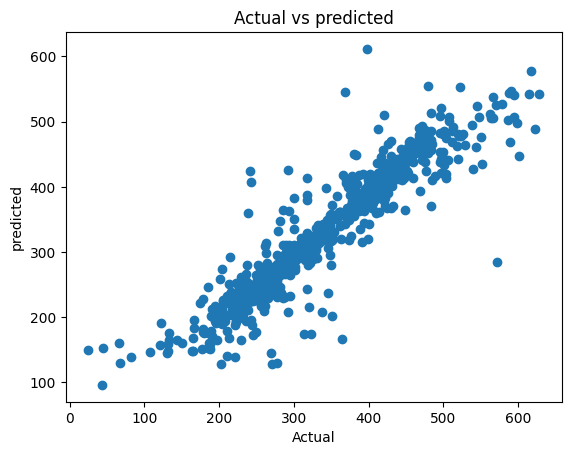

In [96]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model2.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [97]:
y_prd=np.squeeze(np.squeeze(model2.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

23/23 [==============================] - 0s 1ms/step


,Actual,predict,differences
898,259,259.954010,-0.954010
182,187,159.927490,27.072510
565,233,220.683273,12.316727
457,213,222.006531,-9.006531
1852,601,446.564728,154.435272
568,243,225.095306,17.904694
1340,477,424.879425,52.120575
778,207,221.782822,-14.782822
562,231,221.989075,9.010925
716,243,247.442291,-4.442291


## RNN

In [98]:
from keras.layers import Dense, Dropout,Activation, LSTM
from keras.models import Sequential
model3=Sequential()
model3.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],1)))
model3.add(Dropout(0.2))
model3.add(LSTM(units=64, activation='relu', return_sequences=True))
model3.add(Dropout(0.3))
model3.add(LSTM(units=32, activation='relu', return_sequences=True))
model3.add(Dropout(0.4))
model3.add(LSTM(units=64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units=1))
model3.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 dropout_2 (Dropout)         (None, 4, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 64)             49408     
                                                                 
 dropout_3 (Dropout)         (None, 4, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 4, 32)             12416     
                                                                 
 dropout_4 (Dropout)         (None, 4, 32)             0         
                                                                 
 lstm_3 (LSTM)               (None, 64)               

In [99]:
model3.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
37/37 [==============================] - 6s 33ms/step - loss: 67111.9297 - mae: 227.1832 - val_loss: 7439.9077 - val_mae: 67.1006
Epoch 2/2000
37/37 [==============================] - 0s 13ms/step - loss: 18896.9902 - mae: 108.8866 - val_loss: 3617.9836 - val_mae: 41.1011
Epoch 3/2000
37/37 [==============================] - 1s 15ms/step - loss: 13560.2539 - mae: 90.4092 - val_loss: 7786.0518 - val_mae: 73.5349
Epoch 4/2000
37/37 [==============================] - 1s 14ms/step - loss: 12441.0596 - mae: 86.5252 - val_loss: 12112.9297 - val_mae: 94.8177
Epoch 5/2000
37/37 [==============================] - 0s 13ms/step - loss: 10057.4102 - mae: 76.5051 - val_loss: 5867.3867 - val_mae: 59.9815
Epoch 6/2000
37/37 [==============================] - 0s 13ms/step - loss: 9826.1699 - mae: 76.7760 - val_loss: 7655.2456 - val_mae: 71.5703
Epoch 7/2000
37/37 [==============================] - 1s 14ms/step - loss: 9222.8174 - mae: 72.5748 - val_loss: 5205.9800 - val_mae: 53.8682
Epoch

Epoch 116/2000
37/37 [==============================] - 0s 13ms/step - loss: 4333.2163 - mae: 49.0852 - val_loss: 1807.1012 - val_mae: 29.0617
Epoch 117/2000
37/37 [==============================] - 0s 13ms/step - loss: 4029.0808 - mae: 48.2433 - val_loss: 2856.5923 - val_mae: 41.5404
Epoch 118/2000
37/37 [==============================] - 0s 13ms/step - loss: 3981.5537 - mae: 47.7774 - val_loss: 1594.3392 - val_mae: 28.3961
Epoch 119/2000
37/37 [==============================] - 1s 14ms/step - loss: 4840.7319 - mae: 51.8135 - val_loss: 2670.6392 - val_mae: 40.2804
Epoch 120/2000
37/37 [==============================] - 1s 16ms/step - loss: 4229.9185 - mae: 50.1266 - val_loss: 2062.3066 - val_mae: 33.8189
Epoch 121/2000
37/37 [==============================] - 1s 16ms/step - loss: 4307.8174 - mae: 50.4497 - val_loss: 4565.1982 - val_mae: 55.7880
Epoch 122/2000
37/37 [==============================] - 1s 14ms/step - loss: 4149.6401 - mae: 48.8218 - val_loss: 1918.9364 - val_mae: 32.9454

37/37 [==============================] - 0s 13ms/step - loss: 3919.8372 - mae: 46.4332 - val_loss: 2576.6997 - val_mae: 41.2933
Epoch 231/2000
37/37 [==============================] - 0s 13ms/step - loss: 3874.5581 - mae: 46.0993 - val_loss: 1424.8792 - val_mae: 25.5938
Epoch 232/2000
37/37 [==============================] - 1s 14ms/step - loss: 3731.2759 - mae: 46.0998 - val_loss: 1553.5760 - val_mae: 29.2137
Epoch 233/2000
37/37 [==============================] - 1s 15ms/step - loss: 3904.1912 - mae: 47.9389 - val_loss: 2698.7744 - val_mae: 42.5920
Epoch 234/2000
37/37 [==============================] - 0s 13ms/step - loss: 3696.6528 - mae: 46.2434 - val_loss: 1344.7657 - val_mae: 24.8147
Epoch 235/2000
37/37 [==============================] - 0s 13ms/step - loss: 3505.9033 - mae: 44.0309 - val_loss: 1358.8634 - val_mae: 25.3567
Epoch 236/2000
37/37 [==============================] - 1s 13ms/step - loss: 3671.0837 - mae: 45.0661 - val_loss: 3030.4231 - val_mae: 44.8531
Epoch 237/2000

37/37 [==============================] - 1s 14ms/step - loss: 3402.3230 - mae: 43.5104 - val_loss: 1837.4066 - val_mae: 32.8051
Epoch 345/2000
37/37 [==============================] - 1s 14ms/step - loss: 3524.6758 - mae: 44.6828 - val_loss: 1663.1986 - val_mae: 30.2527
Epoch 346/2000
37/37 [==============================] - 1s 14ms/step - loss: 3373.0979 - mae: 44.5409 - val_loss: 1812.9196 - val_mae: 33.3482
Epoch 347/2000
37/37 [==============================] - 1s 14ms/step - loss: 3694.1946 - mae: 45.9256 - val_loss: 1816.0126 - val_mae: 34.5006
Epoch 348/2000
37/37 [==============================] - 1s 14ms/step - loss: 3154.2092 - mae: 42.8552 - val_loss: 1555.5021 - val_mae: 29.1403
Epoch 349/2000
37/37 [==============================] - 1s 14ms/step - loss: 3554.5408 - mae: 44.7140 - val_loss: 1336.3163 - val_mae: 26.3182
Epoch 350/2000
37/37 [==============================] - 1s 14ms/step - loss: 3304.1697 - mae: 43.0776 - val_loss: 2030.2787 - val_mae: 36.2912
Epoch 351/2000

37/37 [==============================] - 0s 13ms/step - loss: 3244.7991 - mae: 42.8190 - val_loss: 1257.1228 - val_mae: 24.7348
Epoch 459/2000
37/37 [==============================] - 0s 13ms/step - loss: 3234.8765 - mae: 43.1353 - val_loss: 1624.0663 - val_mae: 30.4328
Epoch 460/2000
37/37 [==============================] - 0s 12ms/step - loss: 3540.2856 - mae: 44.0267 - val_loss: 1292.7981 - val_mae: 25.8633
Epoch 461/2000
37/37 [==============================] - 1s 14ms/step - loss: 3337.6406 - mae: 43.7906 - val_loss: 2530.2720 - val_mae: 42.0935
Epoch 462/2000
37/37 [==============================] - 0s 13ms/step - loss: 3609.0237 - mae: 44.4898 - val_loss: 2124.4009 - val_mae: 35.9984
Epoch 463/2000
37/37 [==============================] - 0s 13ms/step - loss: 3225.3569 - mae: 43.9484 - val_loss: 1576.2269 - val_mae: 29.3755
Epoch 464/2000
37/37 [==============================] - 0s 12ms/step - loss: 3226.3325 - mae: 42.9416 - val_loss: 2260.6528 - val_mae: 38.5743
Epoch 465/2000

37/37 [==============================] - 1s 15ms/step - loss: 3042.1282 - mae: 41.7789 - val_loss: 3079.2456 - val_mae: 46.7469
Epoch 573/2000
37/37 [==============================] - 1s 15ms/step - loss: 2996.7063 - mae: 41.6483 - val_loss: 1646.0089 - val_mae: 30.6979
Epoch 574/2000
37/37 [==============================] - 1s 14ms/step - loss: 3117.6250 - mae: 40.9427 - val_loss: 1985.5795 - val_mae: 36.2222
Epoch 575/2000
37/37 [==============================] - 1s 14ms/step - loss: 3065.0974 - mae: 41.4560 - val_loss: 1705.7069 - val_mae: 31.3130
Epoch 576/2000
37/37 [==============================] - 1s 15ms/step - loss: 3215.4131 - mae: 42.9739 - val_loss: 1382.5161 - val_mae: 24.7773
Epoch 577/2000
37/37 [==============================] - 1s 15ms/step - loss: 3028.6514 - mae: 41.8015 - val_loss: 1866.8137 - val_mae: 34.2179
Epoch 578/2000
37/37 [==============================] - 1s 15ms/step - loss: 3289.7146 - mae: 42.8664 - val_loss: 1518.0210 - val_mae: 28.9438
Epoch 579/2000

37/37 [==============================] - 0s 12ms/step - loss: 3265.3059 - mae: 42.1545 - val_loss: 1987.2133 - val_mae: 36.7200
Epoch 687/2000
37/37 [==============================] - 0s 12ms/step - loss: 3194.4087 - mae: 43.0613 - val_loss: 1624.1821 - val_mae: 31.1544
Epoch 688/2000
37/37 [==============================] - 0s 12ms/step - loss: 3132.5166 - mae: 42.1307 - val_loss: 2310.3291 - val_mae: 38.3218
Epoch 689/2000
37/37 [==============================] - 0s 12ms/step - loss: 3300.6670 - mae: 43.6098 - val_loss: 2635.7029 - val_mae: 42.6675
Epoch 690/2000
37/37 [==============================] - 0s 12ms/step - loss: 3139.4221 - mae: 42.7863 - val_loss: 1797.1429 - val_mae: 32.9987
Epoch 691/2000
37/37 [==============================] - 0s 12ms/step - loss: 3442.6790 - mae: 43.6192 - val_loss: 2681.0640 - val_mae: 43.6568
Epoch 692/2000
37/37 [==============================] - 0s 12ms/step - loss: 3289.9729 - mae: 43.2362 - val_loss: 1521.1525 - val_mae: 29.5016
Epoch 693/2000

37/37 [==============================] - 1s 14ms/step - loss: 3198.9958 - mae: 42.1908 - val_loss: 1329.2439 - val_mae: 26.3111
Epoch 801/2000
37/37 [==============================] - 1s 14ms/step - loss: 2855.2776 - mae: 40.6077 - val_loss: 1910.4031 - val_mae: 35.3838
Epoch 802/2000
37/37 [==============================] - 1s 14ms/step - loss: 3035.2417 - mae: 40.8828 - val_loss: 1635.1353 - val_mae: 30.1785
Epoch 803/2000
37/37 [==============================] - 1s 14ms/step - loss: 3161.1255 - mae: 42.4416 - val_loss: 1502.2041 - val_mae: 28.6099
Epoch 804/2000
37/37 [==============================] - 1s 14ms/step - loss: 3116.4438 - mae: 42.3796 - val_loss: 2595.2522 - val_mae: 42.1146
Epoch 805/2000
37/37 [==============================] - 1s 14ms/step - loss: 3039.7080 - mae: 42.0900 - val_loss: 1785.4152 - val_mae: 33.1522
Epoch 806/2000
37/37 [==============================] - 1s 14ms/step - loss: 3095.5554 - mae: 41.4347 - val_loss: 1357.5782 - val_mae: 26.1973
Epoch 807/2000

37/37 [==============================] - 0s 13ms/step - loss: 3185.8892 - mae: 42.9365 - val_loss: 1737.2642 - val_mae: 32.6164
Epoch 915/2000
37/37 [==============================] - 1s 14ms/step - loss: 3096.9226 - mae: 42.6379 - val_loss: 1816.8682 - val_mae: 33.0287
Epoch 916/2000
37/37 [==============================] - 0s 13ms/step - loss: 3068.4832 - mae: 42.2730 - val_loss: 2308.3054 - val_mae: 38.7997
Epoch 917/2000
37/37 [==============================] - 0s 13ms/step - loss: 3143.3135 - mae: 41.9819 - val_loss: 1753.3719 - val_mae: 31.4298
Epoch 918/2000
37/37 [==============================] - 0s 13ms/step - loss: 3028.6270 - mae: 41.2641 - val_loss: 1773.2434 - val_mae: 31.9867
Epoch 919/2000
37/37 [==============================] - 0s 13ms/step - loss: 2960.2415 - mae: 40.8317 - val_loss: 1670.3629 - val_mae: 31.4634
Epoch 920/2000
37/37 [==============================] - 0s 13ms/step - loss: 2982.0857 - mae: 41.4727 - val_loss: 1510.5428 - val_mae: 26.6381
Epoch 921/2000

37/37 [==============================] - 1s 14ms/step - loss: 3047.6978 - mae: 40.5078 - val_loss: 1588.8563 - val_mae: 29.0525
Epoch 1029/2000
37/37 [==============================] - 1s 14ms/step - loss: 2906.7332 - mae: 40.7476 - val_loss: 2538.9534 - val_mae: 41.9961
Epoch 1030/2000
37/37 [==============================] - 1s 15ms/step - loss: 3043.7590 - mae: 40.9158 - val_loss: 1254.1504 - val_mae: 23.4277
Epoch 1031/2000
37/37 [==============================] - 1s 14ms/step - loss: 3016.0459 - mae: 41.1254 - val_loss: 1485.1024 - val_mae: 27.2459
Epoch 1032/2000
37/37 [==============================] - 1s 14ms/step - loss: 3069.6277 - mae: 41.0212 - val_loss: 2176.4185 - val_mae: 38.2059
Epoch 1033/2000
37/37 [==============================] - 1s 14ms/step - loss: 3015.2424 - mae: 41.1487 - val_loss: 1595.9363 - val_mae: 29.7544
Epoch 1034/2000
37/37 [==============================] - 1s 14ms/step - loss: 3009.7180 - mae: 41.3746 - val_loss: 1457.8789 - val_mae: 27.3350
Epoch 10

37/37 [==============================] - 1s 14ms/step - loss: 2923.9929 - mae: 40.4397 - val_loss: 1279.7714 - val_mae: 24.3938
Epoch 1086/2000
37/37 [==============================] - 1s 14ms/step - loss: 2821.0718 - mae: 39.5710 - val_loss: 2420.5769 - val_mae: 40.8227
Epoch 1087/2000
37/37 [==============================] - 1s 14ms/step - loss: 2955.6392 - mae: 40.8040 - val_loss: 1618.0067 - val_mae: 30.0051
Epoch 1088/2000
37/37 [==============================] - 1s 14ms/step - loss: 3013.8042 - mae: 41.3449 - val_loss: 1811.6929 - val_mae: 31.9702
Epoch 1089/2000
37/37 [==============================] - 1s 14ms/step - loss: 3073.6909 - mae: 40.8967 - val_loss: 1908.7516 - val_mae: 33.5584
Epoch 1090/2000
37/37 [==============================] - 1s 14ms/step - loss: 2912.3044 - mae: 40.6208 - val_loss: 1721.8151 - val_mae: 32.4975
Epoch 1091/2000
37/37 [==============================] - 1s 14ms/step - loss: 2906.4111 - mae: 40.9202 - val_loss: 2993.2554 - val_mae: 46.4114
Epoch 10

37/37 [==============================] - 0s 13ms/step - loss: 2869.7095 - mae: 40.4806 - val_loss: 1572.1324 - val_mae: 28.6016
Epoch 1143/2000
37/37 [==============================] - 0s 13ms/step - loss: 2694.6963 - mae: 39.3356 - val_loss: 1608.5559 - val_mae: 30.3777
Epoch 1144/2000
37/37 [==============================] - 1s 14ms/step - loss: 2937.3967 - mae: 40.6993 - val_loss: 1450.6979 - val_mae: 27.2741
Epoch 1145/2000
37/37 [==============================] - 1s 15ms/step - loss: 2868.4702 - mae: 40.0213 - val_loss: 2294.6785 - val_mae: 39.8769
Epoch 1146/2000
37/37 [==============================] - 1s 14ms/step - loss: 3144.9707 - mae: 41.3095 - val_loss: 1554.5371 - val_mae: 29.4403
Epoch 1147/2000
37/37 [==============================] - 1s 14ms/step - loss: 2952.6580 - mae: 40.7184 - val_loss: 1546.5684 - val_mae: 28.7812
Epoch 1148/2000
37/37 [==============================] - 1s 14ms/step - loss: 2939.4258 - mae: 40.2685 - val_loss: 1651.6123 - val_mae: 29.8166
Epoch 11

37/37 [==============================] - 0s 12ms/step - loss: 2821.6389 - mae: 39.4172 - val_loss: 1546.8131 - val_mae: 28.0824
Epoch 1200/2000
37/37 [==============================] - 0s 12ms/step - loss: 2841.7993 - mae: 39.9356 - val_loss: 1344.1384 - val_mae: 24.8559
Epoch 1201/2000
37/37 [==============================] - 0s 12ms/step - loss: 2713.1345 - mae: 38.4774 - val_loss: 1467.8679 - val_mae: 26.9772
Epoch 1202/2000
37/37 [==============================] - 0s 13ms/step - loss: 2942.4880 - mae: 41.0157 - val_loss: 2045.7666 - val_mae: 35.1408
Epoch 1203/2000
37/37 [==============================] - 1s 14ms/step - loss: 2859.1497 - mae: 40.1822 - val_loss: 1674.5602 - val_mae: 30.9771
Epoch 1204/2000
37/37 [==============================] - 1s 14ms/step - loss: 2857.9731 - mae: 40.1638 - val_loss: 1453.4581 - val_mae: 28.4506
Epoch 1205/2000
37/37 [==============================] - 1s 14ms/step - loss: 2566.4656 - mae: 37.6252 - val_loss: 1524.9214 - val_mae: 28.8216
Epoch 12

37/37 [==============================] - 1s 14ms/step - loss: 2949.6174 - mae: 39.8088 - val_loss: 1552.9529 - val_mae: 29.4359
Epoch 1257/2000
37/37 [==============================] - 1s 14ms/step - loss: 2653.7786 - mae: 39.4019 - val_loss: 1648.4745 - val_mae: 30.3097
Epoch 1258/2000
37/37 [==============================] - 1s 14ms/step - loss: 2773.2312 - mae: 39.5084 - val_loss: 1596.2783 - val_mae: 29.9645
Epoch 1259/2000
37/37 [==============================] - 1s 14ms/step - loss: 2689.2083 - mae: 39.1790 - val_loss: 1524.8885 - val_mae: 28.5289
Epoch 1260/2000
37/37 [==============================] - 1s 14ms/step - loss: 2755.3125 - mae: 38.7654 - val_loss: 1882.9463 - val_mae: 34.0449
Epoch 1261/2000
37/37 [==============================] - 1s 14ms/step - loss: 2776.1875 - mae: 39.9391 - val_loss: 1629.0404 - val_mae: 28.7538
Epoch 1262/2000
37/37 [==============================] - 1s 14ms/step - loss: 2640.4998 - mae: 38.9151 - val_loss: 1426.1184 - val_mae: 26.0845
Epoch 12

37/37 [==============================] - 1s 14ms/step - loss: 2647.0967 - mae: 39.2269 - val_loss: 1714.0103 - val_mae: 30.5787
Epoch 1314/2000
37/37 [==============================] - 1s 14ms/step - loss: 2821.7798 - mae: 40.5390 - val_loss: 1978.3114 - val_mae: 35.6301
Epoch 1315/2000
37/37 [==============================] - 1s 14ms/step - loss: 2691.5491 - mae: 39.4968 - val_loss: 1621.5603 - val_mae: 26.9423
Epoch 1316/2000
37/37 [==============================] - 1s 14ms/step - loss: 2762.5791 - mae: 39.9898 - val_loss: 1884.4274 - val_mae: 33.9743
Epoch 1317/2000
37/37 [==============================] - 1s 14ms/step - loss: 2981.3430 - mae: 40.7952 - val_loss: 1364.1484 - val_mae: 24.8587
Epoch 1318/2000
37/37 [==============================] - 1s 14ms/step - loss: 2792.1270 - mae: 39.5303 - val_loss: 1864.5925 - val_mae: 33.3872
Epoch 1319/2000
37/37 [==============================] - 1s 14ms/step - loss: 2611.0308 - mae: 38.3609 - val_loss: 1699.2781 - val_mae: 29.6973
Epoch 13

37/37 [==============================] - 0s 13ms/step - loss: 2833.8103 - mae: 39.9776 - val_loss: 3371.8589 - val_mae: 47.9210
Epoch 1371/2000
37/37 [==============================] - 0s 12ms/step - loss: 2840.7859 - mae: 40.1649 - val_loss: 1393.9596 - val_mae: 25.7451
Epoch 1372/2000
37/37 [==============================] - 0s 12ms/step - loss: 2876.8474 - mae: 40.7653 - val_loss: 1863.6350 - val_mae: 31.5173
Epoch 1373/2000
37/37 [==============================] - 0s 12ms/step - loss: 2691.6431 - mae: 39.0799 - val_loss: 1736.7305 - val_mae: 30.1289
Epoch 1374/2000
37/37 [==============================] - 0s 12ms/step - loss: 2956.7812 - mae: 40.4711 - val_loss: 1777.1155 - val_mae: 31.9875
Epoch 1375/2000
37/37 [==============================] - 0s 12ms/step - loss: 2697.8796 - mae: 38.5942 - val_loss: 1541.2325 - val_mae: 28.8726
Epoch 1376/2000
37/37 [==============================] - 0s 12ms/step - loss: 2946.9597 - mae: 41.0396 - val_loss: 2055.9277 - val_mae: 35.8712
Epoch 13

37/37 [==============================] - 0s 12ms/step - loss: 2719.3528 - mae: 39.3427 - val_loss: 2047.0330 - val_mae: 35.2939
Epoch 1428/2000
37/37 [==============================] - 0s 12ms/step - loss: 2955.9517 - mae: 40.5351 - val_loss: 2178.3386 - val_mae: 37.8186
Epoch 1429/2000
37/37 [==============================] - 0s 12ms/step - loss: 2976.7502 - mae: 40.9643 - val_loss: 2022.4601 - val_mae: 35.6157
Epoch 1430/2000
37/37 [==============================] - 0s 12ms/step - loss: 2576.6311 - mae: 38.4361 - val_loss: 1547.5958 - val_mae: 26.2705
Epoch 1431/2000
37/37 [==============================] - 0s 12ms/step - loss: 2933.2583 - mae: 40.5007 - val_loss: 1567.9908 - val_mae: 26.1506
Epoch 1432/2000
37/37 [==============================] - 0s 13ms/step - loss: 2724.5923 - mae: 39.3901 - val_loss: 1781.7373 - val_mae: 31.5259
Epoch 1433/2000
37/37 [==============================] - 0s 12ms/step - loss: 2458.7764 - mae: 37.0085 - val_loss: 1927.5521 - val_mae: 34.4924
Epoch 14

37/37 [==============================] - 1s 14ms/step - loss: 2672.9670 - mae: 38.0755 - val_loss: 2169.4775 - val_mae: 36.1952
Epoch 1485/2000
37/37 [==============================] - 1s 14ms/step - loss: 3011.1506 - mae: 41.1084 - val_loss: 1400.5663 - val_mae: 25.4085
Epoch 1486/2000
37/37 [==============================] - 1s 14ms/step - loss: 3103.3223 - mae: 41.2219 - val_loss: 2245.7180 - val_mae: 37.5566
Epoch 1487/2000
37/37 [==============================] - 1s 14ms/step - loss: 3291.0530 - mae: 42.1217 - val_loss: 1471.9673 - val_mae: 26.4706
Epoch 1488/2000
37/37 [==============================] - 1s 14ms/step - loss: 2852.4541 - mae: 39.7409 - val_loss: 1641.0012 - val_mae: 30.3307
Epoch 1489/2000
37/37 [==============================] - 1s 14ms/step - loss: 2746.7070 - mae: 39.0950 - val_loss: 2837.1748 - val_mae: 43.8328
Epoch 1490/2000
37/37 [==============================] - 1s 14ms/step - loss: 2927.1909 - mae: 40.4512 - val_loss: 1926.2828 - val_mae: 34.5868
Epoch 14

37/37 [==============================] - 1s 14ms/step - loss: 2849.8459 - mae: 40.1840 - val_loss: 1562.9945 - val_mae: 26.5235
Epoch 1542/2000
37/37 [==============================] - 1s 14ms/step - loss: 2497.7366 - mae: 38.0662 - val_loss: 1659.2720 - val_mae: 29.1404
Epoch 1543/2000
37/37 [==============================] - 1s 14ms/step - loss: 2925.1006 - mae: 40.5579 - val_loss: 1456.4176 - val_mae: 25.2573
Epoch 1544/2000
37/37 [==============================] - 1s 14ms/step - loss: 2836.1116 - mae: 39.7295 - val_loss: 1574.7401 - val_mae: 27.2272
Epoch 1545/2000
37/37 [==============================] - 1s 14ms/step - loss: 2731.5637 - mae: 39.4939 - val_loss: 1632.1351 - val_mae: 28.3540
Epoch 1546/2000
37/37 [==============================] - 1s 14ms/step - loss: 2626.2520 - mae: 38.9594 - val_loss: 1679.0869 - val_mae: 29.4707
Epoch 1547/2000
37/37 [==============================] - 1s 14ms/step - loss: 2618.9790 - mae: 38.8592 - val_loss: 1876.4221 - val_mae: 33.1503
Epoch 15

37/37 [==============================] - 0s 12ms/step - loss: 2521.6111 - mae: 37.5134 - val_loss: 1613.7535 - val_mae: 29.5996
Epoch 1599/2000
37/37 [==============================] - 0s 12ms/step - loss: 2516.9114 - mae: 37.9365 - val_loss: 1700.1427 - val_mae: 29.4567
Epoch 1600/2000
37/37 [==============================] - 0s 12ms/step - loss: 2857.2771 - mae: 40.5710 - val_loss: 1698.0900 - val_mae: 29.9419
Epoch 1601/2000
37/37 [==============================] - 0s 12ms/step - loss: 2613.3569 - mae: 39.0347 - val_loss: 1930.6138 - val_mae: 33.7222
Epoch 1602/2000
37/37 [==============================] - 0s 13ms/step - loss: 2784.6553 - mae: 39.8292 - val_loss: 1625.8625 - val_mae: 29.7113
Epoch 1603/2000
37/37 [==============================] - 0s 12ms/step - loss: 2578.4419 - mae: 38.1012 - val_loss: 1534.5957 - val_mae: 26.5240
Epoch 1604/2000
37/37 [==============================] - 0s 12ms/step - loss: 2805.3730 - mae: 39.6058 - val_loss: 1521.7102 - val_mae: 26.5638
Epoch 16

37/37 [==============================] - 0s 12ms/step - loss: 2476.9324 - mae: 37.5392 - val_loss: 1714.6080 - val_mae: 29.9715
Epoch 1656/2000
37/37 [==============================] - 0s 12ms/step - loss: 2769.4529 - mae: 39.7525 - val_loss: 1734.9751 - val_mae: 29.9820
Epoch 1657/2000
37/37 [==============================] - 0s 12ms/step - loss: 2713.5371 - mae: 38.7637 - val_loss: 2069.7229 - val_mae: 35.4898
Epoch 1658/2000
37/37 [==============================] - 0s 13ms/step - loss: 2647.2615 - mae: 37.7220 - val_loss: 1647.3239 - val_mae: 29.4239
Epoch 1659/2000
37/37 [==============================] - 0s 12ms/step - loss: 2499.3833 - mae: 37.7026 - val_loss: 1551.8765 - val_mae: 26.5995
Epoch 1660/2000
37/37 [==============================] - 0s 12ms/step - loss: 2714.8276 - mae: 39.4359 - val_loss: 1499.0848 - val_mae: 28.2443
Epoch 1661/2000
37/37 [==============================] - 0s 12ms/step - loss: 2523.1777 - mae: 38.0878 - val_loss: 1480.3057 - val_mae: 27.2591
Epoch 16

37/37 [==============================] - 1s 14ms/step - loss: 2819.5959 - mae: 39.4771 - val_loss: 1577.8798 - val_mae: 27.4686
Epoch 1713/2000
37/37 [==============================] - 1s 14ms/step - loss: 2783.4907 - mae: 39.6544 - val_loss: 1949.5902 - val_mae: 34.3322
Epoch 1714/2000
37/37 [==============================] - 1s 14ms/step - loss: 2627.3081 - mae: 38.4606 - val_loss: 1689.2699 - val_mae: 30.6643
Epoch 1715/2000
37/37 [==============================] - 1s 14ms/step - loss: 2702.9031 - mae: 38.2804 - val_loss: 1545.5144 - val_mae: 27.4312
Epoch 1716/2000
37/37 [==============================] - 1s 14ms/step - loss: 2593.1819 - mae: 38.4989 - val_loss: 1527.3594 - val_mae: 27.6232
Epoch 1717/2000
37/37 [==============================] - 1s 14ms/step - loss: 2658.1826 - mae: 39.2581 - val_loss: 2419.1135 - val_mae: 39.1066
Epoch 1718/2000
37/37 [==============================] - 1s 14ms/step - loss: 2592.3811 - mae: 37.9414 - val_loss: 1871.8513 - val_mae: 32.3211
Epoch 17

37/37 [==============================] - 1s 14ms/step - loss: 2598.1597 - mae: 38.3122 - val_loss: 1694.4822 - val_mae: 29.8011
Epoch 1770/2000
37/37 [==============================] - 1s 14ms/step - loss: 2667.0571 - mae: 38.8058 - val_loss: 1889.1339 - val_mae: 32.4002
Epoch 1771/2000
37/37 [==============================] - 1s 14ms/step - loss: 2583.4795 - mae: 38.5074 - val_loss: 1684.8207 - val_mae: 29.4774
Epoch 1772/2000
37/37 [==============================] - 1s 15ms/step - loss: 2481.7817 - mae: 36.8358 - val_loss: 1654.3503 - val_mae: 28.6462
Epoch 1773/2000
37/37 [==============================] - 1s 14ms/step - loss: 2569.5864 - mae: 37.9505 - val_loss: 2010.6996 - val_mae: 34.0999
Epoch 1774/2000
37/37 [==============================] - 1s 14ms/step - loss: 2499.6768 - mae: 37.1163 - val_loss: 1779.6066 - val_mae: 31.7837
Epoch 1775/2000
37/37 [==============================] - 1s 14ms/step - loss: 2509.6580 - mae: 38.0665 - val_loss: 1934.9717 - val_mae: 33.3208
Epoch 17

37/37 [==============================] - 1s 15ms/step - loss: 2456.6492 - mae: 37.9561 - val_loss: 1756.9644 - val_mae: 30.3541
Epoch 1827/2000
37/37 [==============================] - 0s 13ms/step - loss: 2575.7598 - mae: 37.8807 - val_loss: 1903.2277 - val_mae: 33.4964
Epoch 1828/2000
37/37 [==============================] - 0s 12ms/step - loss: 2376.7026 - mae: 37.0334 - val_loss: 1638.1841 - val_mae: 29.4719
Epoch 1829/2000
37/37 [==============================] - 0s 12ms/step - loss: 2788.8713 - mae: 40.3291 - val_loss: 1640.2004 - val_mae: 28.4569
Epoch 1830/2000
37/37 [==============================] - 0s 12ms/step - loss: 2631.8354 - mae: 38.2391 - val_loss: 1739.4100 - val_mae: 30.9533
Epoch 1831/2000
37/37 [==============================] - 0s 13ms/step - loss: 2399.7625 - mae: 37.1427 - val_loss: 1645.2421 - val_mae: 29.3939
Epoch 1832/2000
37/37 [==============================] - 0s 12ms/step - loss: 2467.6465 - mae: 37.0863 - val_loss: 1923.3160 - val_mae: 33.4199
Epoch 18

37/37 [==============================] - 0s 12ms/step - loss: 2594.7097 - mae: 38.8793 - val_loss: 1799.9941 - val_mae: 30.7393
Epoch 1884/2000
37/37 [==============================] - 0s 12ms/step - loss: 2683.9243 - mae: 37.8557 - val_loss: 1572.9042 - val_mae: 25.9242
Epoch 1885/2000
37/37 [==============================] - 0s 12ms/step - loss: 2578.7710 - mae: 37.8973 - val_loss: 1863.2722 - val_mae: 31.4599
Epoch 1886/2000
37/37 [==============================] - 0s 12ms/step - loss: 2485.7417 - mae: 37.3618 - val_loss: 2022.9631 - val_mae: 33.1965
Epoch 1887/2000
37/37 [==============================] - 0s 12ms/step - loss: 2488.9429 - mae: 37.4949 - val_loss: 2161.0508 - val_mae: 35.5527
Epoch 1888/2000
37/37 [==============================] - 0s 12ms/step - loss: 2406.0723 - mae: 37.2201 - val_loss: 2102.3418 - val_mae: 35.0382
Epoch 1889/2000
37/37 [==============================] - 0s 12ms/step - loss: 2748.4238 - mae: 39.8177 - val_loss: 2084.7986 - val_mae: 34.3186
Epoch 18

37/37 [==============================] - 1s 14ms/step - loss: 2496.1553 - mae: 37.2764 - val_loss: 2123.3713 - val_mae: 34.6124
Epoch 1941/2000
37/37 [==============================] - 1s 14ms/step - loss: 2505.7195 - mae: 37.2375 - val_loss: 2014.6277 - val_mae: 33.6426
Epoch 1942/2000
37/37 [==============================] - 1s 14ms/step - loss: 2743.3694 - mae: 38.9998 - val_loss: 1932.1738 - val_mae: 32.1258
Epoch 1943/2000
37/37 [==============================] - 1s 14ms/step - loss: 2355.5698 - mae: 36.3763 - val_loss: 2113.5332 - val_mae: 35.3738
Epoch 1944/2000
37/37 [==============================] - 1s 14ms/step - loss: 2418.4675 - mae: 37.5352 - val_loss: 1545.1248 - val_mae: 26.6320
Epoch 1945/2000
37/37 [==============================] - 1s 14ms/step - loss: 2386.5935 - mae: 37.1665 - val_loss: 2414.0146 - val_mae: 39.0925
Epoch 1946/2000
37/37 [==============================] - 1s 14ms/step - loss: 2549.3430 - mae: 37.1779 - val_loss: 2100.2219 - val_mae: 35.2477
Epoch 19

37/37 [==============================] - 1s 14ms/step - loss: 2568.4434 - mae: 38.3550 - val_loss: 1851.2610 - val_mae: 31.5530
Epoch 1998/2000
37/37 [==============================] - 1s 14ms/step - loss: 2764.3516 - mae: 38.8679 - val_loss: 1633.2648 - val_mae: 26.8327
Epoch 1999/2000
37/37 [==============================] - 1s 14ms/step - loss: 2838.5786 - mae: 39.2172 - val_loss: 1956.4442 - val_mae: 33.1095
Epoch 2000/2000
37/37 [==============================] - 1s 14ms/step - loss: 2531.6895 - mae: 37.7686 - val_loss: 1980.6294 - val_mae: 35.4084


In [100]:
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model3.predict(X_test)) )

23/23 [==============================] - 1s 5ms/step


0.7594427233005538

In [101]:
prediction =np.squeeze(model3.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 1s 547ms/step
Prediction: 257.50567626953125


In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model3.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model3.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

23/23 [==============================] - 0s 4ms/step
mean squired error: 2685.7874784976443
mean absolute error: 37.28425473659313


23/23 [==============================] - 0s 4ms/step


Text(0.5, 1.0, 'Actual vs predicted')

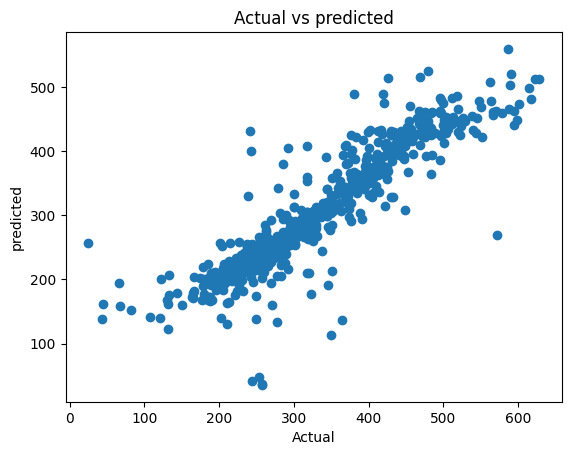

In [103]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model3.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [104]:
y_prd=np.squeeze(np.squeeze(model3.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

23/23 [==============================] - 0s 4ms/step


,Actual,predict,differences
898,259,251.053085,7.946915
182,187,172.283691,14.716309
565,233,216.746826,16.253174
457,213,212.206360,0.793640
1852,601,473.210663,127.789337
568,243,215.231659,27.768341
1340,477,391.691406,85.308594
778,207,223.795929,-16.795929
562,231,217.521667,13.478333
716,243,231.027420,11.972580


## keras tuner with dense

In [105]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

C:\Users\rafi\AppData\Local\Temp\ipykernel_6780\1490801469.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [106]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project1',project_name='A1')

INFO:tensorflow:Reloading Oracle from existing project project1\A1\oracle.json
INFO:tensorflow:Reloading Tuner from project1\A1\tuner0.json


In [107]:
tuner.search(X_train,Y_train ,epochs=100,validation_data=(X_test,Y_test))

INFO:tensorflow:Oracle triggered exit


In [108]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [109]:
model4 = tuner.hypermodel.build(best_hps)
model4.fit(X_train, Y_train, epochs=2000,batch_size=32, validation_split=0.3)

Epoch 1/2000
37/37 [==============================] - 1s 6ms/step - loss: 66.8155 - mean_absolute_error: 66.8155 - val_loss: 46.8197 - val_mean_absolute_error: 46.8197
Epoch 2/2000
37/37 [==============================] - 0s 3ms/step - loss: 35.1527 - mean_absolute_error: 35.1527 - val_loss: 34.5834 - val_mean_absolute_error: 34.5834
Epoch 3/2000
37/37 [==============================] - 0s 3ms/step - loss: 39.2479 - mean_absolute_error: 39.2479 - val_loss: 31.5856 - val_mean_absolute_error: 31.5856
Epoch 4/2000
37/37 [==============================] - 0s 3ms/step - loss: 34.1926 - mean_absolute_error: 34.1926 - val_loss: 37.8061 - val_mean_absolute_error: 37.8061
Epoch 5/2000
37/37 [==============================] - 0s 3ms/step - loss: 35.2236 - mean_absolute_error: 35.2236 - val_loss: 32.2423 - val_mean_absolute_error: 32.2423
Epoch 6/2000
37/37 [==============================] - 0s 3ms/step - loss: 36.0026 - mean_absolute_error: 36.0026 - val_loss: 35.1045 - val_mean_absolute_error: 

37/37 [==============================] - 0s 3ms/step - loss: 31.1460 - mean_absolute_error: 31.1460 - val_loss: 33.5831 - val_mean_absolute_error: 33.5831
Epoch 98/2000
37/37 [==============================] - 0s 2ms/step - loss: 31.8600 - mean_absolute_error: 31.8600 - val_loss: 28.9485 - val_mean_absolute_error: 28.9485
Epoch 99/2000
37/37 [==============================] - 0s 2ms/step - loss: 33.7492 - mean_absolute_error: 33.7492 - val_loss: 29.7632 - val_mean_absolute_error: 29.7632
Epoch 100/2000
37/37 [==============================] - 0s 2ms/step - loss: 30.4417 - mean_absolute_error: 30.4417 - val_loss: 31.2153 - val_mean_absolute_error: 31.2153
Epoch 101/2000
37/37 [==============================] - 0s 3ms/step - loss: 30.2220 - mean_absolute_error: 30.2220 - val_loss: 32.9317 - val_mean_absolute_error: 32.9317
Epoch 102/2000
37/37 [==============================] - 0s 3ms/step - loss: 30.2987 - mean_absolute_error: 30.2987 - val_loss: 30.4943 - val_mean_absolute_error: 30.49

37/37 [==============================] - 0s 3ms/step - loss: 28.5919 - mean_absolute_error: 28.5919 - val_loss: 28.6366 - val_mean_absolute_error: 28.6366
Epoch 194/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.8883 - mean_absolute_error: 28.8883 - val_loss: 31.5918 - val_mean_absolute_error: 31.5918
Epoch 195/2000
37/37 [==============================] - 0s 3ms/step - loss: 31.3080 - mean_absolute_error: 31.3080 - val_loss: 30.9161 - val_mean_absolute_error: 30.9161
Epoch 196/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.8891 - mean_absolute_error: 28.8891 - val_loss: 28.4636 - val_mean_absolute_error: 28.4636
Epoch 197/2000
37/37 [==============================] - 0s 3ms/step - loss: 29.2372 - mean_absolute_error: 29.2372 - val_loss: 32.0825 - val_mean_absolute_error: 32.0825
Epoch 198/2000
37/37 [==============================] - 0s 3ms/step - loss: 31.2063 - mean_absolute_error: 31.2063 - val_loss: 28.3049 - val_mean_absolute_error: 28.

37/37 [==============================] - 0s 3ms/step - loss: 29.2996 - mean_absolute_error: 29.2996 - val_loss: 28.0132 - val_mean_absolute_error: 28.0132
Epoch 290/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.3836 - mean_absolute_error: 28.3836 - val_loss: 30.9427 - val_mean_absolute_error: 30.9427
Epoch 291/2000
37/37 [==============================] - 0s 3ms/step - loss: 29.2305 - mean_absolute_error: 29.2305 - val_loss: 28.8201 - val_mean_absolute_error: 28.8201
Epoch 292/2000
37/37 [==============================] - 0s 3ms/step - loss: 27.9068 - mean_absolute_error: 27.9068 - val_loss: 28.9909 - val_mean_absolute_error: 28.9909
Epoch 293/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.5985 - mean_absolute_error: 28.5985 - val_loss: 28.7744 - val_mean_absolute_error: 28.7744
Epoch 294/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.2616 - mean_absolute_error: 28.2616 - val_loss: 28.6408 - val_mean_absolute_error: 28.

37/37 [==============================] - 0s 2ms/step - loss: 30.6181 - mean_absolute_error: 30.6181 - val_loss: 28.5691 - val_mean_absolute_error: 28.5691
Epoch 386/2000
37/37 [==============================] - 0s 3ms/step - loss: 29.0032 - mean_absolute_error: 29.0032 - val_loss: 33.6933 - val_mean_absolute_error: 33.6933
Epoch 387/2000
37/37 [==============================] - 0s 2ms/step - loss: 31.5336 - mean_absolute_error: 31.5336 - val_loss: 28.7334 - val_mean_absolute_error: 28.7334
Epoch 388/2000
37/37 [==============================] - 0s 3ms/step - loss: 30.6531 - mean_absolute_error: 30.6531 - val_loss: 29.1141 - val_mean_absolute_error: 29.1141
Epoch 389/2000
37/37 [==============================] - 0s 3ms/step - loss: 30.9387 - mean_absolute_error: 30.9387 - val_loss: 39.7899 - val_mean_absolute_error: 39.7899
Epoch 390/2000
37/37 [==============================] - 0s 2ms/step - loss: 29.1456 - mean_absolute_error: 29.1456 - val_loss: 30.4943 - val_mean_absolute_error: 30.

37/37 [==============================] - 0s 4ms/step - loss: 28.9522 - mean_absolute_error: 28.9522 - val_loss: 28.8980 - val_mean_absolute_error: 28.8980
Epoch 482/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.2330 - mean_absolute_error: 28.2330 - val_loss: 33.8620 - val_mean_absolute_error: 33.8620
Epoch 483/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.3382 - mean_absolute_error: 28.3382 - val_loss: 30.6360 - val_mean_absolute_error: 30.6360
Epoch 484/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.6413 - mean_absolute_error: 28.6413 - val_loss: 29.1834 - val_mean_absolute_error: 29.1834
Epoch 485/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.8019 - mean_absolute_error: 28.8019 - val_loss: 27.7706 - val_mean_absolute_error: 27.7706
Epoch 486/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.8636 - mean_absolute_error: 28.8636 - val_loss: 28.7131 - val_mean_absolute_error: 28.

37/37 [==============================] - 0s 3ms/step - loss: 29.6536 - mean_absolute_error: 29.6536 - val_loss: 29.0095 - val_mean_absolute_error: 29.0095
Epoch 578/2000
37/37 [==============================] - 0s 2ms/step - loss: 30.6988 - mean_absolute_error: 30.6988 - val_loss: 31.4407 - val_mean_absolute_error: 31.4407
Epoch 579/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.7861 - mean_absolute_error: 28.7861 - val_loss: 30.5741 - val_mean_absolute_error: 30.5741
Epoch 580/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.4366 - mean_absolute_error: 28.4366 - val_loss: 27.8002 - val_mean_absolute_error: 27.8002
Epoch 581/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.5607 - mean_absolute_error: 28.5607 - val_loss: 30.2178 - val_mean_absolute_error: 30.2178
Epoch 582/2000
37/37 [==============================] - 0s 3ms/step - loss: 29.1626 - mean_absolute_error: 29.1626 - val_loss: 28.3606 - val_mean_absolute_error: 28.

37/37 [==============================] - 0s 4ms/step - loss: 30.9716 - mean_absolute_error: 30.9716 - val_loss: 29.4408 - val_mean_absolute_error: 29.4408
Epoch 674/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.1476 - mean_absolute_error: 28.1476 - val_loss: 30.5660 - val_mean_absolute_error: 30.5660
Epoch 675/2000
37/37 [==============================] - 0s 3ms/step - loss: 31.3593 - mean_absolute_error: 31.3593 - val_loss: 27.7485 - val_mean_absolute_error: 27.7485
Epoch 676/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.8217 - mean_absolute_error: 28.8217 - val_loss: 29.3553 - val_mean_absolute_error: 29.3553
Epoch 677/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.9990 - mean_absolute_error: 28.9990 - val_loss: 29.4754 - val_mean_absolute_error: 29.4754
Epoch 678/2000
37/37 [==============================] - 0s 3ms/step - loss: 33.3136 - mean_absolute_error: 33.3136 - val_loss: 27.8105 - val_mean_absolute_error: 27.

37/37 [==============================] - 0s 3ms/step - loss: 29.6157 - mean_absolute_error: 29.6157 - val_loss: 28.1453 - val_mean_absolute_error: 28.1453
Epoch 770/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.7208 - mean_absolute_error: 28.7208 - val_loss: 30.9030 - val_mean_absolute_error: 30.9030
Epoch 771/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.6431 - mean_absolute_error: 28.6431 - val_loss: 30.4261 - val_mean_absolute_error: 30.4261
Epoch 772/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.9988 - mean_absolute_error: 28.9988 - val_loss: 28.5703 - val_mean_absolute_error: 28.5703
Epoch 773/2000
37/37 [==============================] - 0s 3ms/step - loss: 29.0369 - mean_absolute_error: 29.0369 - val_loss: 28.4690 - val_mean_absolute_error: 28.4690
Epoch 774/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.6522 - mean_absolute_error: 28.6522 - val_loss: 29.4897 - val_mean_absolute_error: 29.

37/37 [==============================] - 0s 3ms/step - loss: 29.2634 - mean_absolute_error: 29.2634 - val_loss: 27.6566 - val_mean_absolute_error: 27.6566
Epoch 866/2000
37/37 [==============================] - 0s 3ms/step - loss: 27.9796 - mean_absolute_error: 27.9796 - val_loss: 29.1179 - val_mean_absolute_error: 29.1179
Epoch 867/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.2454 - mean_absolute_error: 28.2454 - val_loss: 27.8394 - val_mean_absolute_error: 27.8394
Epoch 868/2000
37/37 [==============================] - 0s 3ms/step - loss: 30.2099 - mean_absolute_error: 30.2099 - val_loss: 29.2108 - val_mean_absolute_error: 29.2108
Epoch 869/2000
37/37 [==============================] - 0s 3ms/step - loss: 31.8286 - mean_absolute_error: 31.8286 - val_loss: 31.8754 - val_mean_absolute_error: 31.8754
Epoch 870/2000
37/37 [==============================] - 0s 3ms/step - loss: 29.2505 - mean_absolute_error: 29.2505 - val_loss: 32.2976 - val_mean_absolute_error: 32.

37/37 [==============================] - 0s 3ms/step - loss: 29.0187 - mean_absolute_error: 29.0187 - val_loss: 30.5689 - val_mean_absolute_error: 30.5689
Epoch 962/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.9195 - mean_absolute_error: 28.9195 - val_loss: 27.9894 - val_mean_absolute_error: 27.9894
Epoch 963/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.2128 - mean_absolute_error: 28.2128 - val_loss: 27.8926 - val_mean_absolute_error: 27.8926
Epoch 964/2000
37/37 [==============================] - 0s 2ms/step - loss: 29.2327 - mean_absolute_error: 29.2327 - val_loss: 29.4595 - val_mean_absolute_error: 29.4595
Epoch 965/2000
37/37 [==============================] - 0s 2ms/step - loss: 29.6125 - mean_absolute_error: 29.6125 - val_loss: 28.1324 - val_mean_absolute_error: 28.1324
Epoch 966/2000
37/37 [==============================] - 0s 3ms/step - loss: 29.2699 - mean_absolute_error: 29.2699 - val_loss: 33.1214 - val_mean_absolute_error: 33.

37/37 [==============================] - 0s 3ms/step - loss: 29.2775 - mean_absolute_error: 29.2775 - val_loss: 27.9131 - val_mean_absolute_error: 27.9131
Epoch 1058/2000
37/37 [==============================] - 0s 2ms/step - loss: 29.1828 - mean_absolute_error: 29.1828 - val_loss: 34.6859 - val_mean_absolute_error: 34.6859
Epoch 1059/2000
37/37 [==============================] - 0s 3ms/step - loss: 32.2992 - mean_absolute_error: 32.2992 - val_loss: 31.5954 - val_mean_absolute_error: 31.5954
Epoch 1060/2000
37/37 [==============================] - 0s 3ms/step - loss: 29.7345 - mean_absolute_error: 29.7345 - val_loss: 28.9427 - val_mean_absolute_error: 28.9427
Epoch 1061/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.8486 - mean_absolute_error: 28.8486 - val_loss: 30.7434 - val_mean_absolute_error: 30.7434
Epoch 1062/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.9200 - mean_absolute_error: 28.9200 - val_loss: 29.5538 - val_mean_absolute_error

37/37 [==============================] - 0s 2ms/step - loss: 29.3376 - mean_absolute_error: 29.3376 - val_loss: 29.5440 - val_mean_absolute_error: 29.5440
Epoch 1106/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.9055 - mean_absolute_error: 28.9055 - val_loss: 30.6931 - val_mean_absolute_error: 30.6931
Epoch 1107/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.6286 - mean_absolute_error: 28.6286 - val_loss: 27.8563 - val_mean_absolute_error: 27.8563
Epoch 1108/2000
37/37 [==============================] - 0s 2ms/step - loss: 30.4232 - mean_absolute_error: 30.4232 - val_loss: 28.2831 - val_mean_absolute_error: 28.2831
Epoch 1109/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.8459 - mean_absolute_error: 28.8459 - val_loss: 29.0130 - val_mean_absolute_error: 29.0130
Epoch 1110/2000
37/37 [==============================] - 0s 2ms/step - loss: 29.1481 - mean_absolute_error: 29.1481 - val_loss: 30.7034 - val_mean_absolute_error

37/37 [==============================] - 0s 3ms/step - loss: 28.1862 - mean_absolute_error: 28.1862 - val_loss: 28.2902 - val_mean_absolute_error: 28.2902
Epoch 1154/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.7793 - mean_absolute_error: 28.7793 - val_loss: 30.9873 - val_mean_absolute_error: 30.9873
Epoch 1155/2000
37/37 [==============================] - 0s 3ms/step - loss: 30.8645 - mean_absolute_error: 30.8645 - val_loss: 33.7493 - val_mean_absolute_error: 33.7493
Epoch 1156/2000
37/37 [==============================] - 0s 2ms/step - loss: 30.4954 - mean_absolute_error: 30.4954 - val_loss: 34.4282 - val_mean_absolute_error: 34.4282
Epoch 1157/2000
37/37 [==============================] - 0s 3ms/step - loss: 30.7417 - mean_absolute_error: 30.7417 - val_loss: 29.4612 - val_mean_absolute_error: 29.4612
Epoch 1158/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.5209 - mean_absolute_error: 28.5209 - val_loss: 28.4298 - val_mean_absolute_error

37/37 [==============================] - 0s 2ms/step - loss: 28.6910 - mean_absolute_error: 28.6910 - val_loss: 28.3605 - val_mean_absolute_error: 28.3605
Epoch 1202/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.8761 - mean_absolute_error: 28.8761 - val_loss: 28.3590 - val_mean_absolute_error: 28.3590
Epoch 1203/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.3483 - mean_absolute_error: 28.3483 - val_loss: 31.5364 - val_mean_absolute_error: 31.5364
Epoch 1204/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.1426 - mean_absolute_error: 28.1426 - val_loss: 28.3284 - val_mean_absolute_error: 28.3284
Epoch 1205/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.8361 - mean_absolute_error: 28.8361 - val_loss: 29.7138 - val_mean_absolute_error: 29.7138
Epoch 1206/2000
37/37 [==============================] - 0s 3ms/step - loss: 30.1707 - mean_absolute_error: 30.1707 - val_loss: 28.5820 - val_mean_absolute_error

37/37 [==============================] - 0s 2ms/step - loss: 29.3400 - mean_absolute_error: 29.3400 - val_loss: 28.0352 - val_mean_absolute_error: 28.0352
Epoch 1250/2000
37/37 [==============================] - 0s 2ms/step - loss: 30.7161 - mean_absolute_error: 30.7161 - val_loss: 33.7689 - val_mean_absolute_error: 33.7689
Epoch 1251/2000
37/37 [==============================] - 0s 2ms/step - loss: 32.1217 - mean_absolute_error: 32.1217 - val_loss: 41.5025 - val_mean_absolute_error: 41.5025
Epoch 1252/2000
37/37 [==============================] - 0s 2ms/step - loss: 31.1567 - mean_absolute_error: 31.1567 - val_loss: 29.1002 - val_mean_absolute_error: 29.1002
Epoch 1253/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.5410 - mean_absolute_error: 28.5410 - val_loss: 29.3147 - val_mean_absolute_error: 29.3147
Epoch 1254/2000
37/37 [==============================] - 0s 3ms/step - loss: 30.0942 - mean_absolute_error: 30.0942 - val_loss: 29.1922 - val_mean_absolute_error

37/37 [==============================] - 0s 4ms/step - loss: 27.7638 - mean_absolute_error: 27.7638 - val_loss: 29.6147 - val_mean_absolute_error: 29.6147
Epoch 1298/2000
37/37 [==============================] - 0s 3ms/step - loss: 30.6456 - mean_absolute_error: 30.6456 - val_loss: 29.5775 - val_mean_absolute_error: 29.5775
Epoch 1299/2000
37/37 [==============================] - 0s 3ms/step - loss: 30.4627 - mean_absolute_error: 30.4627 - val_loss: 28.8846 - val_mean_absolute_error: 28.8846
Epoch 1300/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.0283 - mean_absolute_error: 28.0283 - val_loss: 27.7336 - val_mean_absolute_error: 27.7336
Epoch 1301/2000
37/37 [==============================] - 0s 2ms/step - loss: 27.8862 - mean_absolute_error: 27.8862 - val_loss: 29.1390 - val_mean_absolute_error: 29.1390
Epoch 1302/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.3020 - mean_absolute_error: 28.3020 - val_loss: 29.8177 - val_mean_absolute_error

37/37 [==============================] - 0s 3ms/step - loss: 28.1601 - mean_absolute_error: 28.1601 - val_loss: 31.5626 - val_mean_absolute_error: 31.5626
Epoch 1346/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.9602 - mean_absolute_error: 28.9602 - val_loss: 30.5890 - val_mean_absolute_error: 30.5890
Epoch 1347/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.5987 - mean_absolute_error: 28.5987 - val_loss: 28.8004 - val_mean_absolute_error: 28.8004
Epoch 1348/2000
37/37 [==============================] - 0s 2ms/step - loss: 29.3616 - mean_absolute_error: 29.3616 - val_loss: 28.0617 - val_mean_absolute_error: 28.0617
Epoch 1349/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.2577 - mean_absolute_error: 28.2577 - val_loss: 28.6283 - val_mean_absolute_error: 28.6283
Epoch 1350/2000
37/37 [==============================] - 0s 2ms/step - loss: 30.1137 - mean_absolute_error: 30.1137 - val_loss: 27.7539 - val_mean_absolute_error

37/37 [==============================] - 0s 3ms/step - loss: 30.4306 - mean_absolute_error: 30.4306 - val_loss: 33.2093 - val_mean_absolute_error: 33.2093
Epoch 1394/2000
37/37 [==============================] - 0s 2ms/step - loss: 30.0152 - mean_absolute_error: 30.0152 - val_loss: 31.2850 - val_mean_absolute_error: 31.2850
Epoch 1395/2000
37/37 [==============================] - 0s 3ms/step - loss: 29.0358 - mean_absolute_error: 29.0358 - val_loss: 29.3543 - val_mean_absolute_error: 29.3543
Epoch 1396/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.4559 - mean_absolute_error: 28.4559 - val_loss: 29.1693 - val_mean_absolute_error: 29.1693
Epoch 1397/2000
37/37 [==============================] - 0s 3ms/step - loss: 30.4195 - mean_absolute_error: 30.4195 - val_loss: 28.6802 - val_mean_absolute_error: 28.6802
Epoch 1398/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.5279 - mean_absolute_error: 28.5279 - val_loss: 29.4871 - val_mean_absolute_error

37/37 [==============================] - 0s 2ms/step - loss: 31.1216 - mean_absolute_error: 31.1216 - val_loss: 31.9580 - val_mean_absolute_error: 31.9580
Epoch 1442/2000
37/37 [==============================] - 0s 2ms/step - loss: 29.0608 - mean_absolute_error: 29.0608 - val_loss: 30.6963 - val_mean_absolute_error: 30.6963
Epoch 1443/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.8703 - mean_absolute_error: 28.8703 - val_loss: 28.0909 - val_mean_absolute_error: 28.0909
Epoch 1444/2000
37/37 [==============================] - 0s 3ms/step - loss: 29.6334 - mean_absolute_error: 29.6334 - val_loss: 29.4772 - val_mean_absolute_error: 29.4772
Epoch 1445/2000
37/37 [==============================] - 0s 2ms/step - loss: 31.3514 - mean_absolute_error: 31.3514 - val_loss: 38.5491 - val_mean_absolute_error: 38.5491
Epoch 1446/2000
37/37 [==============================] - 0s 3ms/step - loss: 29.9675 - mean_absolute_error: 29.9675 - val_loss: 29.8380 - val_mean_absolute_error

37/37 [==============================] - 0s 2ms/step - loss: 29.1738 - mean_absolute_error: 29.1738 - val_loss: 28.3842 - val_mean_absolute_error: 28.3842
Epoch 1490/2000
37/37 [==============================] - 0s 2ms/step - loss: 29.5620 - mean_absolute_error: 29.5620 - val_loss: 38.3959 - val_mean_absolute_error: 38.3959
Epoch 1491/2000
37/37 [==============================] - 0s 3ms/step - loss: 32.7768 - mean_absolute_error: 32.7768 - val_loss: 34.6233 - val_mean_absolute_error: 34.6233
Epoch 1492/2000
37/37 [==============================] - 0s 2ms/step - loss: 29.3943 - mean_absolute_error: 29.3943 - val_loss: 28.0968 - val_mean_absolute_error: 28.0968
Epoch 1493/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.6909 - mean_absolute_error: 28.6909 - val_loss: 29.8126 - val_mean_absolute_error: 29.8126
Epoch 1494/2000
37/37 [==============================] - 0s 3ms/step - loss: 29.1481 - mean_absolute_error: 29.1481 - val_loss: 30.3130 - val_mean_absolute_error

37/37 [==============================] - 0s 3ms/step - loss: 32.1175 - mean_absolute_error: 32.1175 - val_loss: 37.6464 - val_mean_absolute_error: 37.6464
Epoch 1538/2000
37/37 [==============================] - 0s 3ms/step - loss: 29.5094 - mean_absolute_error: 29.5094 - val_loss: 28.2929 - val_mean_absolute_error: 28.2929
Epoch 1539/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.2095 - mean_absolute_error: 28.2095 - val_loss: 30.6737 - val_mean_absolute_error: 30.6737
Epoch 1540/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.4084 - mean_absolute_error: 28.4084 - val_loss: 28.3477 - val_mean_absolute_error: 28.3477
Epoch 1541/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.7747 - mean_absolute_error: 28.7747 - val_loss: 27.9229 - val_mean_absolute_error: 27.9229
Epoch 1542/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.8032 - mean_absolute_error: 28.8032 - val_loss: 27.8887 - val_mean_absolute_error

37/37 [==============================] - 0s 3ms/step - loss: 29.8838 - mean_absolute_error: 29.8838 - val_loss: 31.3648 - val_mean_absolute_error: 31.3648
Epoch 1586/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.8421 - mean_absolute_error: 28.8421 - val_loss: 29.5987 - val_mean_absolute_error: 29.5987
Epoch 1587/2000
37/37 [==============================] - 0s 3ms/step - loss: 33.4023 - mean_absolute_error: 33.4023 - val_loss: 43.3784 - val_mean_absolute_error: 43.3784
Epoch 1588/2000
37/37 [==============================] - 0s 2ms/step - loss: 30.2211 - mean_absolute_error: 30.2211 - val_loss: 29.3549 - val_mean_absolute_error: 29.3549
Epoch 1589/2000
37/37 [==============================] - 0s 3ms/step - loss: 29.2849 - mean_absolute_error: 29.2849 - val_loss: 29.9494 - val_mean_absolute_error: 29.9494
Epoch 1590/2000
37/37 [==============================] - 0s 3ms/step - loss: 30.2309 - mean_absolute_error: 30.2309 - val_loss: 29.5038 - val_mean_absolute_error

37/37 [==============================] - 0s 2ms/step - loss: 30.7674 - mean_absolute_error: 30.7674 - val_loss: 31.9300 - val_mean_absolute_error: 31.9300
Epoch 1634/2000
37/37 [==============================] - 0s 2ms/step - loss: 33.0203 - mean_absolute_error: 33.0203 - val_loss: 31.6776 - val_mean_absolute_error: 31.6776
Epoch 1635/2000
37/37 [==============================] - 0s 3ms/step - loss: 29.4678 - mean_absolute_error: 29.4678 - val_loss: 29.1232 - val_mean_absolute_error: 29.1232
Epoch 1636/2000
37/37 [==============================] - 0s 3ms/step - loss: 30.8543 - mean_absolute_error: 30.8543 - val_loss: 29.1903 - val_mean_absolute_error: 29.1903
Epoch 1637/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.6711 - mean_absolute_error: 28.6711 - val_loss: 28.0691 - val_mean_absolute_error: 28.0691
Epoch 1638/2000
37/37 [==============================] - 0s 3ms/step - loss: 29.3351 - mean_absolute_error: 29.3351 - val_loss: 34.8809 - val_mean_absolute_error

37/37 [==============================] - 0s 3ms/step - loss: 28.3650 - mean_absolute_error: 28.3650 - val_loss: 27.8999 - val_mean_absolute_error: 27.8999
Epoch 1682/2000
37/37 [==============================] - 0s 2ms/step - loss: 27.9868 - mean_absolute_error: 27.9868 - val_loss: 32.4062 - val_mean_absolute_error: 32.4062
Epoch 1683/2000
37/37 [==============================] - 0s 3ms/step - loss: 30.4934 - mean_absolute_error: 30.4934 - val_loss: 27.6436 - val_mean_absolute_error: 27.6436
Epoch 1684/2000
37/37 [==============================] - 0s 3ms/step - loss: 27.9687 - mean_absolute_error: 27.9687 - val_loss: 27.7511 - val_mean_absolute_error: 27.7511
Epoch 1685/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.3339 - mean_absolute_error: 28.3339 - val_loss: 28.1967 - val_mean_absolute_error: 28.1967
Epoch 1686/2000
37/37 [==============================] - 0s 2ms/step - loss: 27.8782 - mean_absolute_error: 27.8782 - val_loss: 28.1560 - val_mean_absolute_error

37/37 [==============================] - 0s 3ms/step - loss: 28.5366 - mean_absolute_error: 28.5366 - val_loss: 27.7814 - val_mean_absolute_error: 27.7814
Epoch 1730/2000
37/37 [==============================] - 0s 2ms/step - loss: 29.8907 - mean_absolute_error: 29.8907 - val_loss: 28.4605 - val_mean_absolute_error: 28.4605
Epoch 1731/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.8355 - mean_absolute_error: 28.8355 - val_loss: 29.1012 - val_mean_absolute_error: 29.1012
Epoch 1732/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.5656 - mean_absolute_error: 28.5656 - val_loss: 28.6778 - val_mean_absolute_error: 28.6778
Epoch 1733/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.3561 - mean_absolute_error: 28.3561 - val_loss: 28.7227 - val_mean_absolute_error: 28.7227
Epoch 1734/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.9948 - mean_absolute_error: 28.9948 - val_loss: 28.1741 - val_mean_absolute_error

37/37 [==============================] - 0s 3ms/step - loss: 28.2078 - mean_absolute_error: 28.2078 - val_loss: 28.3332 - val_mean_absolute_error: 28.3332
Epoch 1778/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.5468 - mean_absolute_error: 28.5468 - val_loss: 28.2613 - val_mean_absolute_error: 28.2613
Epoch 1779/2000
37/37 [==============================] - 0s 3ms/step - loss: 29.1602 - mean_absolute_error: 29.1602 - val_loss: 28.2994 - val_mean_absolute_error: 28.2994
Epoch 1780/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.1885 - mean_absolute_error: 28.1885 - val_loss: 29.3366 - val_mean_absolute_error: 29.3366
Epoch 1781/2000
37/37 [==============================] - 0s 2ms/step - loss: 28.6568 - mean_absolute_error: 28.6568 - val_loss: 33.3697 - val_mean_absolute_error: 33.3697
Epoch 1782/2000
37/37 [==============================] - 0s 3ms/step - loss: 30.5757 - mean_absolute_error: 30.5757 - val_loss: 33.2541 - val_mean_absolute_error

37/37 [==============================] - 0s 4ms/step - loss: 29.0723 - mean_absolute_error: 29.0723 - val_loss: 27.9632 - val_mean_absolute_error: 27.9632
Epoch 1826/2000
37/37 [==============================] - 0s 3ms/step - loss: 31.0063 - mean_absolute_error: 31.0063 - val_loss: 28.8036 - val_mean_absolute_error: 28.8036
Epoch 1827/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.1423 - mean_absolute_error: 28.1423 - val_loss: 29.2677 - val_mean_absolute_error: 29.2677
Epoch 1828/2000
37/37 [==============================] - 0s 3ms/step - loss: 29.5318 - mean_absolute_error: 29.5318 - val_loss: 28.9599 - val_mean_absolute_error: 28.9599
Epoch 1829/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.6364 - mean_absolute_error: 28.6364 - val_loss: 31.1651 - val_mean_absolute_error: 31.1651
Epoch 1830/2000
37/37 [==============================] - 0s 3ms/step - loss: 30.1482 - mean_absolute_error: 30.1482 - val_loss: 32.1212 - val_mean_absolute_error

37/37 [==============================] - 0s 3ms/step - loss: 30.4706 - mean_absolute_error: 30.4706 - val_loss: 33.5891 - val_mean_absolute_error: 33.5891
Epoch 1874/2000
37/37 [==============================] - 0s 3ms/step - loss: 29.7948 - mean_absolute_error: 29.7948 - val_loss: 29.8300 - val_mean_absolute_error: 29.8300
Epoch 1875/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.7277 - mean_absolute_error: 28.7277 - val_loss: 30.3671 - val_mean_absolute_error: 30.3671
Epoch 1876/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.4665 - mean_absolute_error: 28.4665 - val_loss: 29.3185 - val_mean_absolute_error: 29.3185
Epoch 1877/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.6068 - mean_absolute_error: 28.6068 - val_loss: 28.1327 - val_mean_absolute_error: 28.1327
Epoch 1878/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.7122 - mean_absolute_error: 28.7122 - val_loss: 28.2582 - val_mean_absolute_error

37/37 [==============================] - 0s 3ms/step - loss: 27.9889 - mean_absolute_error: 27.9889 - val_loss: 29.2478 - val_mean_absolute_error: 29.2478
Epoch 1922/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.7920 - mean_absolute_error: 28.7920 - val_loss: 29.0161 - val_mean_absolute_error: 29.0161
Epoch 1923/2000
37/37 [==============================] - 0s 3ms/step - loss: 29.4782 - mean_absolute_error: 29.4782 - val_loss: 29.2200 - val_mean_absolute_error: 29.2200
Epoch 1924/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.9975 - mean_absolute_error: 28.9975 - val_loss: 33.4762 - val_mean_absolute_error: 33.4762
Epoch 1925/2000
37/37 [==============================] - 0s 3ms/step - loss: 30.5240 - mean_absolute_error: 30.5240 - val_loss: 31.5789 - val_mean_absolute_error: 31.5789
Epoch 1926/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.8668 - mean_absolute_error: 28.8668 - val_loss: 27.9664 - val_mean_absolute_error

37/37 [==============================] - 0s 3ms/step - loss: 28.2396 - mean_absolute_error: 28.2396 - val_loss: 30.7290 - val_mean_absolute_error: 30.7290
Epoch 1970/2000
37/37 [==============================] - 0s 3ms/step - loss: 30.5881 - mean_absolute_error: 30.5881 - val_loss: 28.0261 - val_mean_absolute_error: 28.0261
Epoch 1971/2000
37/37 [==============================] - 0s 3ms/step - loss: 30.7389 - mean_absolute_error: 30.7389 - val_loss: 28.0451 - val_mean_absolute_error: 28.0451
Epoch 1972/2000
37/37 [==============================] - 0s 3ms/step - loss: 29.2260 - mean_absolute_error: 29.2260 - val_loss: 27.9772 - val_mean_absolute_error: 27.9772
Epoch 1973/2000
37/37 [==============================] - 0s 4ms/step - loss: 28.3865 - mean_absolute_error: 28.3865 - val_loss: 30.8260 - val_mean_absolute_error: 30.8260
Epoch 1974/2000
37/37 [==============================] - 0s 3ms/step - loss: 28.2538 - mean_absolute_error: 28.2538 - val_loss: 31.3964 - val_mean_absolute_error

In [110]:
import numpy as np
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model4.predict(X_test)) )

23/23 [==============================] - 0s 1ms/step


0.7794132446245394

In [113]:
prediction =np.squeeze(model4.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 0s 68ms/step
Prediction: 304.12701416015625


In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model4.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model4.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

23/23 [==============================] - 0s 1ms/step
mean squired error: 2462.8194733433265
mean absolute error: 34.32337896095938


23/23 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Actual vs predicted')

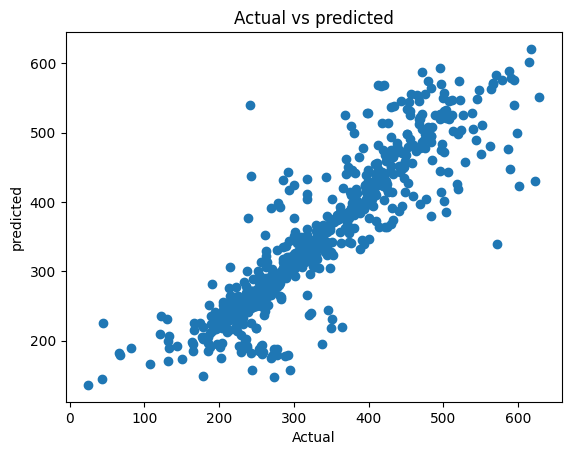

In [114]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model4.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [115]:
y_prd=np.squeeze(np.squeeze(model4.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

23/23 [==============================] - 0s 1ms/step


,Actual,predict,differences
898,259,281.830048,-22.830048
182,187,251.903000,-64.903000
565,233,241.098801,-8.098801
457,213,242.851425,-29.851425
1852,601,422.551758,178.448242
568,243,257.313721,-14.313721
1340,477,403.645142,73.354858
778,207,251.423492,-44.423492
562,231,243.944550,-12.944550
716,243,263.063568,-20.063568


## keras tuner with RNN

In [116]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense,LSTM,Dropout
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.LSTM(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                                           input_shape=(X_train.shape[1],1),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [117]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project2',project_name='A2')

INFO:tensorflow:Reloading Oracle from existing project project2\A2\oracle.json
INFO:tensorflow:Reloading Tuner from project2\A2\tuner0.json


In [118]:
tuner.search(X_train,Y_train ,epochs=100,validation_data=(X_test,Y_test))

INFO:tensorflow:Oracle triggered exit


In [119]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [120]:
model5 = tuner.hypermodel.build(best_hps)
model5.fit(X_train, Y_train, epochs=2000,batch_size=32, validation_split=0.3)

Epoch 1/2000
37/37 [==============================] - 2s 26ms/step - loss: 74.2039 - mean_absolute_error: 74.2039 - val_loss: 32.6790 - val_mean_absolute_error: 32.6790
Epoch 2/2000
37/37 [==============================] - 1s 20ms/step - loss: 35.1191 - mean_absolute_error: 35.1191 - val_loss: 40.0178 - val_mean_absolute_error: 40.0178
Epoch 3/2000
37/37 [==============================] - 1s 20ms/step - loss: 32.1378 - mean_absolute_error: 32.1378 - val_loss: 29.9205 - val_mean_absolute_error: 29.9205
Epoch 4/2000
37/37 [==============================] - 1s 20ms/step - loss: 31.4623 - mean_absolute_error: 31.4623 - val_loss: 33.3468 - val_mean_absolute_error: 33.3468
Epoch 5/2000
37/37 [==============================] - 1s 21ms/step - loss: 32.2271 - mean_absolute_error: 32.2271 - val_loss: 42.3169 - val_mean_absolute_error: 42.3169
Epoch 6/2000
37/37 [==============================] - 1s 20ms/step - loss: 34.8427 - mean_absolute_error: 34.8427 - val_loss: 28.9540 - val_mean_absolute_e

37/37 [==============================] - 1s 21ms/step - loss: 25.2910 - mean_absolute_error: 25.2910 - val_loss: 31.6056 - val_mean_absolute_error: 31.6056
Epoch 98/2000
37/37 [==============================] - 1s 20ms/step - loss: 26.8090 - mean_absolute_error: 26.8090 - val_loss: 26.8989 - val_mean_absolute_error: 26.8989
Epoch 99/2000
37/37 [==============================] - 1s 21ms/step - loss: 25.5946 - mean_absolute_error: 25.5946 - val_loss: 26.3630 - val_mean_absolute_error: 26.3630
Epoch 100/2000
37/37 [==============================] - 1s 20ms/step - loss: 25.3930 - mean_absolute_error: 25.3930 - val_loss: 25.9576 - val_mean_absolute_error: 25.9576
Epoch 101/2000
37/37 [==============================] - 1s 20ms/step - loss: 24.5892 - mean_absolute_error: 24.5892 - val_loss: 27.7339 - val_mean_absolute_error: 27.7339
Epoch 102/2000
37/37 [==============================] - 1s 21ms/step - loss: 24.6437 - mean_absolute_error: 24.6437 - val_loss: 27.3098 - val_mean_absolute_error:

37/37 [==============================] - 1s 22ms/step - loss: 25.3510 - mean_absolute_error: 25.3510 - val_loss: 30.5468 - val_mean_absolute_error: 30.5468
Epoch 146/2000
37/37 [==============================] - 1s 22ms/step - loss: 24.6761 - mean_absolute_error: 24.6761 - val_loss: 25.7870 - val_mean_absolute_error: 25.7870
Epoch 147/2000
37/37 [==============================] - 1s 22ms/step - loss: 24.4530 - mean_absolute_error: 24.4530 - val_loss: 27.3098 - val_mean_absolute_error: 27.3098
Epoch 148/2000
37/37 [==============================] - 1s 22ms/step - loss: 24.3739 - mean_absolute_error: 24.3739 - val_loss: 28.2901 - val_mean_absolute_error: 28.2901
Epoch 149/2000
37/37 [==============================] - 1s 22ms/step - loss: 23.7739 - mean_absolute_error: 23.7739 - val_loss: 27.1460 - val_mean_absolute_error: 27.1460
Epoch 150/2000
37/37 [==============================] - 1s 23ms/step - loss: 24.7459 - mean_absolute_error: 24.7459 - val_loss: 27.9436 - val_mean_absolute_erro

Epoch 193/2000
37/37 [==============================] - 1s 25ms/step - loss: 24.1680 - mean_absolute_error: 24.1680 - val_loss: 26.3238 - val_mean_absolute_error: 26.3238
Epoch 194/2000
37/37 [==============================] - 1s 25ms/step - loss: 23.8923 - mean_absolute_error: 23.8923 - val_loss: 25.8139 - val_mean_absolute_error: 25.8139
Epoch 195/2000
37/37 [==============================] - 1s 25ms/step - loss: 24.8693 - mean_absolute_error: 24.8693 - val_loss: 26.8606 - val_mean_absolute_error: 26.8606
Epoch 196/2000
37/37 [==============================] - 1s 24ms/step - loss: 24.0934 - mean_absolute_error: 24.0934 - val_loss: 26.9986 - val_mean_absolute_error: 26.9986
Epoch 197/2000
37/37 [==============================] - 1s 25ms/step - loss: 22.9267 - mean_absolute_error: 22.9267 - val_loss: 34.4677 - val_mean_absolute_error: 34.4677
Epoch 198/2000
37/37 [==============================] - 1s 25ms/step - loss: 25.0112 - mean_absolute_error: 25.0112 - val_loss: 27.6559 - val_mea

Epoch 241/2000
37/37 [==============================] - 1s 31ms/step - loss: 22.4880 - mean_absolute_error: 22.4880 - val_loss: 26.1362 - val_mean_absolute_error: 26.1362
Epoch 242/2000
37/37 [==============================] - 1s 30ms/step - loss: 24.6933 - mean_absolute_error: 24.6933 - val_loss: 27.5501 - val_mean_absolute_error: 27.5501
Epoch 243/2000
37/37 [==============================] - 1s 33ms/step - loss: 24.2566 - mean_absolute_error: 24.2566 - val_loss: 25.5116 - val_mean_absolute_error: 25.5116
Epoch 244/2000
37/37 [==============================] - 1s 26ms/step - loss: 25.2699 - mean_absolute_error: 25.2699 - val_loss: 25.4113 - val_mean_absolute_error: 25.4113
Epoch 245/2000
37/37 [==============================] - 1s 24ms/step - loss: 23.5096 - mean_absolute_error: 23.5096 - val_loss: 26.5967 - val_mean_absolute_error: 26.5967
Epoch 246/2000
37/37 [==============================] - 1s 27ms/step - loss: 23.3233 - mean_absolute_error: 23.3233 - val_loss: 26.3675 - val_mea

Epoch 289/2000
37/37 [==============================] - 1s 26ms/step - loss: 22.7161 - mean_absolute_error: 22.7161 - val_loss: 25.7982 - val_mean_absolute_error: 25.7982
Epoch 290/2000
37/37 [==============================] - 1s 24ms/step - loss: 23.6410 - mean_absolute_error: 23.6410 - val_loss: 25.9114 - val_mean_absolute_error: 25.9114
Epoch 291/2000
37/37 [==============================] - 1s 25ms/step - loss: 22.3605 - mean_absolute_error: 22.3605 - val_loss: 25.6898 - val_mean_absolute_error: 25.6898
Epoch 292/2000
37/37 [==============================] - 1s 22ms/step - loss: 22.5505 - mean_absolute_error: 22.5505 - val_loss: 26.6482 - val_mean_absolute_error: 26.6482
Epoch 293/2000
37/37 [==============================] - 1s 21ms/step - loss: 22.8569 - mean_absolute_error: 22.8569 - val_loss: 26.9678 - val_mean_absolute_error: 26.9678
Epoch 294/2000
37/37 [==============================] - 1s 23ms/step - loss: 22.9823 - mean_absolute_error: 22.9823 - val_loss: 26.6005 - val_mea

Epoch 337/2000
37/37 [==============================] - 1s 23ms/step - loss: 22.3351 - mean_absolute_error: 22.3351 - val_loss: 26.7347 - val_mean_absolute_error: 26.7347
Epoch 338/2000
37/37 [==============================] - 1s 22ms/step - loss: 23.4071 - mean_absolute_error: 23.4071 - val_loss: 26.0201 - val_mean_absolute_error: 26.0201
Epoch 339/2000
37/37 [==============================] - 1s 22ms/step - loss: 22.4245 - mean_absolute_error: 22.4245 - val_loss: 25.8507 - val_mean_absolute_error: 25.8507
Epoch 340/2000
37/37 [==============================] - 1s 23ms/step - loss: 23.4618 - mean_absolute_error: 23.4618 - val_loss: 26.0083 - val_mean_absolute_error: 26.0083
Epoch 341/2000
37/37 [==============================] - 1s 22ms/step - loss: 23.0314 - mean_absolute_error: 23.0314 - val_loss: 26.5312 - val_mean_absolute_error: 26.5312
Epoch 342/2000
37/37 [==============================] - 1s 22ms/step - loss: 23.3547 - mean_absolute_error: 23.3547 - val_loss: 27.5282 - val_mea

Epoch 385/2000
37/37 [==============================] - 1s 22ms/step - loss: 22.4783 - mean_absolute_error: 22.4783 - val_loss: 25.5777 - val_mean_absolute_error: 25.5777
Epoch 386/2000
37/37 [==============================] - 1s 23ms/step - loss: 22.1659 - mean_absolute_error: 22.1659 - val_loss: 27.9977 - val_mean_absolute_error: 27.9977
Epoch 387/2000
37/37 [==============================] - 1s 22ms/step - loss: 22.8462 - mean_absolute_error: 22.8462 - val_loss: 26.9663 - val_mean_absolute_error: 26.9663
Epoch 388/2000
37/37 [==============================] - 1s 22ms/step - loss: 22.1151 - mean_absolute_error: 22.1151 - val_loss: 29.6447 - val_mean_absolute_error: 29.6447
Epoch 389/2000
37/37 [==============================] - 1s 23ms/step - loss: 22.3609 - mean_absolute_error: 22.3609 - val_loss: 25.2236 - val_mean_absolute_error: 25.2236
Epoch 390/2000
37/37 [==============================] - 1s 22ms/step - loss: 22.3017 - mean_absolute_error: 22.3017 - val_loss: 27.9976 - val_mea

Epoch 433/2000
37/37 [==============================] - 1s 20ms/step - loss: 22.1892 - mean_absolute_error: 22.1892 - val_loss: 25.7557 - val_mean_absolute_error: 25.7557
Epoch 434/2000
37/37 [==============================] - 1s 20ms/step - loss: 21.9799 - mean_absolute_error: 21.9799 - val_loss: 27.3853 - val_mean_absolute_error: 27.3853
Epoch 435/2000
37/37 [==============================] - 1s 20ms/step - loss: 22.3575 - mean_absolute_error: 22.3575 - val_loss: 26.7307 - val_mean_absolute_error: 26.7307
Epoch 436/2000
37/37 [==============================] - 1s 21ms/step - loss: 21.8616 - mean_absolute_error: 21.8616 - val_loss: 25.8942 - val_mean_absolute_error: 25.8942
Epoch 437/2000
37/37 [==============================] - 1s 22ms/step - loss: 22.9199 - mean_absolute_error: 22.9199 - val_loss: 28.5738 - val_mean_absolute_error: 28.5738
Epoch 438/2000
37/37 [==============================] - 1s 20ms/step - loss: 22.2738 - mean_absolute_error: 22.2738 - val_loss: 25.4908 - val_mea

Epoch 481/2000
37/37 [==============================] - 1s 20ms/step - loss: 22.7136 - mean_absolute_error: 22.7136 - val_loss: 25.7007 - val_mean_absolute_error: 25.7007
Epoch 482/2000
37/37 [==============================] - 1s 20ms/step - loss: 22.3788 - mean_absolute_error: 22.3788 - val_loss: 25.8230 - val_mean_absolute_error: 25.8230
Epoch 483/2000
37/37 [==============================] - 1s 20ms/step - loss: 23.0262 - mean_absolute_error: 23.0262 - val_loss: 28.9244 - val_mean_absolute_error: 28.9244
Epoch 484/2000
37/37 [==============================] - 1s 20ms/step - loss: 23.3925 - mean_absolute_error: 23.3925 - val_loss: 27.3296 - val_mean_absolute_error: 27.3296
Epoch 485/2000
37/37 [==============================] - 1s 20ms/step - loss: 22.0351 - mean_absolute_error: 22.0351 - val_loss: 26.2402 - val_mean_absolute_error: 26.2402
Epoch 486/2000
37/37 [==============================] - 1s 21ms/step - loss: 22.1849 - mean_absolute_error: 22.1849 - val_loss: 30.7028 - val_mea

Epoch 529/2000
37/37 [==============================] - 1s 22ms/step - loss: 21.5277 - mean_absolute_error: 21.5277 - val_loss: 26.1031 - val_mean_absolute_error: 26.1031
Epoch 530/2000
37/37 [==============================] - 1s 22ms/step - loss: 21.9590 - mean_absolute_error: 21.9590 - val_loss: 27.4073 - val_mean_absolute_error: 27.4073
Epoch 531/2000
37/37 [==============================] - 1s 22ms/step - loss: 21.3646 - mean_absolute_error: 21.3646 - val_loss: 25.9679 - val_mean_absolute_error: 25.9679
Epoch 532/2000
37/37 [==============================] - 1s 22ms/step - loss: 21.9038 - mean_absolute_error: 21.9038 - val_loss: 25.3820 - val_mean_absolute_error: 25.3820
Epoch 533/2000
37/37 [==============================] - 1s 22ms/step - loss: 21.6875 - mean_absolute_error: 21.6875 - val_loss: 26.2532 - val_mean_absolute_error: 26.2532
Epoch 534/2000
37/37 [==============================] - 1s 22ms/step - loss: 21.7441 - mean_absolute_error: 21.7441 - val_loss: 25.4407 - val_mea

Epoch 577/2000
37/37 [==============================] - 1s 22ms/step - loss: 21.8498 - mean_absolute_error: 21.8498 - val_loss: 25.5358 - val_mean_absolute_error: 25.5358
Epoch 578/2000
37/37 [==============================] - 1s 22ms/step - loss: 21.5368 - mean_absolute_error: 21.5368 - val_loss: 25.4314 - val_mean_absolute_error: 25.4314
Epoch 579/2000
37/37 [==============================] - 1s 22ms/step - loss: 22.8159 - mean_absolute_error: 22.8159 - val_loss: 28.6969 - val_mean_absolute_error: 28.6969
Epoch 580/2000
37/37 [==============================] - 1s 22ms/step - loss: 22.8293 - mean_absolute_error: 22.8293 - val_loss: 26.2153 - val_mean_absolute_error: 26.2153
Epoch 581/2000
37/37 [==============================] - 1s 23ms/step - loss: 23.0271 - mean_absolute_error: 23.0271 - val_loss: 25.6925 - val_mean_absolute_error: 25.6925
Epoch 582/2000
37/37 [==============================] - 1s 22ms/step - loss: 22.1231 - mean_absolute_error: 22.1231 - val_loss: 26.7198 - val_mea

Epoch 625/2000
37/37 [==============================] - 1s 25ms/step - loss: 21.2938 - mean_absolute_error: 21.2938 - val_loss: 26.3065 - val_mean_absolute_error: 26.3065
Epoch 626/2000
37/37 [==============================] - 1s 25ms/step - loss: 21.0448 - mean_absolute_error: 21.0448 - val_loss: 26.7688 - val_mean_absolute_error: 26.7688
Epoch 627/2000
37/37 [==============================] - 1s 25ms/step - loss: 21.4995 - mean_absolute_error: 21.4995 - val_loss: 26.1212 - val_mean_absolute_error: 26.1212
Epoch 628/2000
37/37 [==============================] - 1s 24ms/step - loss: 21.7155 - mean_absolute_error: 21.7155 - val_loss: 26.5563 - val_mean_absolute_error: 26.5563
Epoch 629/2000
37/37 [==============================] - 1s 24ms/step - loss: 21.5264 - mean_absolute_error: 21.5264 - val_loss: 27.8656 - val_mean_absolute_error: 27.8656
Epoch 630/2000
37/37 [==============================] - 1s 23ms/step - loss: 20.7676 - mean_absolute_error: 20.7676 - val_loss: 25.9783 - val_mea

Epoch 673/2000
37/37 [==============================] - 1s 26ms/step - loss: 22.1498 - mean_absolute_error: 22.1498 - val_loss: 27.0987 - val_mean_absolute_error: 27.0987
Epoch 674/2000
37/37 [==============================] - 1s 20ms/step - loss: 21.8344 - mean_absolute_error: 21.8344 - val_loss: 25.2211 - val_mean_absolute_error: 25.2211
Epoch 675/2000
37/37 [==============================] - 1s 20ms/step - loss: 21.0914 - mean_absolute_error: 21.0914 - val_loss: 25.7397 - val_mean_absolute_error: 25.7397
Epoch 676/2000
37/37 [==============================] - 1s 20ms/step - loss: 21.4120 - mean_absolute_error: 21.4120 - val_loss: 25.4624 - val_mean_absolute_error: 25.4624
Epoch 677/2000
37/37 [==============================] - 1s 20ms/step - loss: 20.6003 - mean_absolute_error: 20.6003 - val_loss: 25.3703 - val_mean_absolute_error: 25.3703
Epoch 678/2000
37/37 [==============================] - 1s 20ms/step - loss: 21.0630 - mean_absolute_error: 21.0630 - val_loss: 26.8949 - val_mea

Epoch 721/2000
37/37 [==============================] - 1s 20ms/step - loss: 21.1933 - mean_absolute_error: 21.1933 - val_loss: 26.1520 - val_mean_absolute_error: 26.1520
Epoch 722/2000
37/37 [==============================] - 1s 20ms/step - loss: 21.2354 - mean_absolute_error: 21.2354 - val_loss: 26.1962 - val_mean_absolute_error: 26.1962
Epoch 723/2000
37/37 [==============================] - 1s 20ms/step - loss: 21.3987 - mean_absolute_error: 21.3987 - val_loss: 25.9645 - val_mean_absolute_error: 25.9645
Epoch 724/2000
37/37 [==============================] - 1s 20ms/step - loss: 21.5740 - mean_absolute_error: 21.5740 - val_loss: 25.8602 - val_mean_absolute_error: 25.8602
Epoch 725/2000
37/37 [==============================] - 1s 20ms/step - loss: 21.1671 - mean_absolute_error: 21.1671 - val_loss: 25.9843 - val_mean_absolute_error: 25.9843
Epoch 726/2000
37/37 [==============================] - 1s 21ms/step - loss: 21.2093 - mean_absolute_error: 21.2093 - val_loss: 25.5155 - val_mea

Epoch 769/2000
37/37 [==============================] - 1s 23ms/step - loss: 22.3485 - mean_absolute_error: 22.3485 - val_loss: 26.6460 - val_mean_absolute_error: 26.6460
Epoch 770/2000
37/37 [==============================] - 1s 24ms/step - loss: 21.8367 - mean_absolute_error: 21.8367 - val_loss: 26.3048 - val_mean_absolute_error: 26.3048
Epoch 771/2000
37/37 [==============================] - 1s 24ms/step - loss: 21.0745 - mean_absolute_error: 21.0745 - val_loss: 25.8723 - val_mean_absolute_error: 25.8723
Epoch 772/2000
37/37 [==============================] - 1s 24ms/step - loss: 21.5338 - mean_absolute_error: 21.5338 - val_loss: 26.3537 - val_mean_absolute_error: 26.3537
Epoch 773/2000
37/37 [==============================] - 1s 24ms/step - loss: 21.9964 - mean_absolute_error: 21.9964 - val_loss: 25.6807 - val_mean_absolute_error: 25.6807
Epoch 774/2000
37/37 [==============================] - 1s 24ms/step - loss: 22.6354 - mean_absolute_error: 22.6354 - val_loss: 26.8730 - val_mea

Epoch 817/2000
37/37 [==============================] - 1s 22ms/step - loss: 21.2371 - mean_absolute_error: 21.2371 - val_loss: 26.0898 - val_mean_absolute_error: 26.0898
Epoch 818/2000
37/37 [==============================] - 1s 23ms/step - loss: 21.4014 - mean_absolute_error: 21.4014 - val_loss: 25.8871 - val_mean_absolute_error: 25.8871
Epoch 819/2000
37/37 [==============================] - 1s 23ms/step - loss: 21.1339 - mean_absolute_error: 21.1339 - val_loss: 26.1822 - val_mean_absolute_error: 26.1822
Epoch 820/2000
37/37 [==============================] - 1s 22ms/step - loss: 20.8516 - mean_absolute_error: 20.8516 - val_loss: 26.1285 - val_mean_absolute_error: 26.1285
Epoch 821/2000
37/37 [==============================] - 1s 23ms/step - loss: 21.9943 - mean_absolute_error: 21.9943 - val_loss: 27.4596 - val_mean_absolute_error: 27.4596
Epoch 822/2000
37/37 [==============================] - 1s 23ms/step - loss: 21.6636 - mean_absolute_error: 21.6636 - val_loss: 25.8830 - val_mea

Epoch 865/2000
37/37 [==============================] - 1s 23ms/step - loss: 20.9732 - mean_absolute_error: 20.9732 - val_loss: 28.1357 - val_mean_absolute_error: 28.1357
Epoch 866/2000
37/37 [==============================] - 1s 21ms/step - loss: 21.4043 - mean_absolute_error: 21.4043 - val_loss: 25.7314 - val_mean_absolute_error: 25.7314
Epoch 867/2000
37/37 [==============================] - 1s 21ms/step - loss: 20.4053 - mean_absolute_error: 20.4053 - val_loss: 26.7529 - val_mean_absolute_error: 26.7529
Epoch 868/2000
37/37 [==============================] - 1s 21ms/step - loss: 20.3577 - mean_absolute_error: 20.3577 - val_loss: 26.5647 - val_mean_absolute_error: 26.5647
Epoch 869/2000
37/37 [==============================] - 1s 21ms/step - loss: 20.7260 - mean_absolute_error: 20.7260 - val_loss: 26.7076 - val_mean_absolute_error: 26.7076
Epoch 870/2000
37/37 [==============================] - 1s 21ms/step - loss: 20.7509 - mean_absolute_error: 20.7509 - val_loss: 26.0128 - val_mea

Epoch 913/2000
37/37 [==============================] - 1s 22ms/step - loss: 20.7462 - mean_absolute_error: 20.7462 - val_loss: 25.8099 - val_mean_absolute_error: 25.8099
Epoch 914/2000
37/37 [==============================] - 1s 22ms/step - loss: 21.0578 - mean_absolute_error: 21.0578 - val_loss: 27.5137 - val_mean_absolute_error: 27.5137
Epoch 915/2000
37/37 [==============================] - 1s 23ms/step - loss: 21.0623 - mean_absolute_error: 21.0623 - val_loss: 26.0855 - val_mean_absolute_error: 26.0855
Epoch 916/2000
37/37 [==============================] - 1s 22ms/step - loss: 20.6000 - mean_absolute_error: 20.6000 - val_loss: 25.5250 - val_mean_absolute_error: 25.5250
Epoch 917/2000
37/37 [==============================] - 1s 23ms/step - loss: 20.8289 - mean_absolute_error: 20.8289 - val_loss: 26.8793 - val_mean_absolute_error: 26.8793
Epoch 918/2000
37/37 [==============================] - 1s 23ms/step - loss: 20.9995 - mean_absolute_error: 20.9995 - val_loss: 26.0316 - val_mea

Epoch 961/2000
37/37 [==============================] - 1s 27ms/step - loss: 21.9127 - mean_absolute_error: 21.9127 - val_loss: 25.5822 - val_mean_absolute_error: 25.5822
Epoch 962/2000
37/37 [==============================] - 1s 27ms/step - loss: 21.0034 - mean_absolute_error: 21.0034 - val_loss: 25.8477 - val_mean_absolute_error: 25.8477
Epoch 963/2000
37/37 [==============================] - 1s 27ms/step - loss: 21.1605 - mean_absolute_error: 21.1605 - val_loss: 27.9323 - val_mean_absolute_error: 27.9323
Epoch 964/2000
37/37 [==============================] - 1s 29ms/step - loss: 20.9190 - mean_absolute_error: 20.9190 - val_loss: 26.3176 - val_mean_absolute_error: 26.3176
Epoch 965/2000
37/37 [==============================] - 1s 28ms/step - loss: 20.8172 - mean_absolute_error: 20.8172 - val_loss: 25.6263 - val_mean_absolute_error: 25.6263
Epoch 966/2000
37/37 [==============================] - 1s 26ms/step - loss: 21.1691 - mean_absolute_error: 21.1691 - val_loss: 26.9776 - val_mea

Epoch 1009/2000
37/37 [==============================] - 1s 22ms/step - loss: 21.6470 - mean_absolute_error: 21.6470 - val_loss: 26.5588 - val_mean_absolute_error: 26.5588
Epoch 1010/2000
37/37 [==============================] - 1s 23ms/step - loss: 21.0437 - mean_absolute_error: 21.0437 - val_loss: 25.6266 - val_mean_absolute_error: 25.6266
Epoch 1011/2000
37/37 [==============================] - 1s 23ms/step - loss: 20.7046 - mean_absolute_error: 20.7046 - val_loss: 25.4063 - val_mean_absolute_error: 25.4063
Epoch 1012/2000
37/37 [==============================] - 1s 28ms/step - loss: 20.4947 - mean_absolute_error: 20.4947 - val_loss: 26.6288 - val_mean_absolute_error: 26.6288
Epoch 1013/2000
37/37 [==============================] - 1s 27ms/step - loss: 21.0520 - mean_absolute_error: 21.0520 - val_loss: 26.0046 - val_mean_absolute_error: 26.0046
Epoch 1014/2000
37/37 [==============================] - 1s 23ms/step - loss: 22.2666 - mean_absolute_error: 22.2666 - val_loss: 26.5684 - v

Epoch 1104/2000
37/37 [==============================] - 1s 20ms/step - loss: 20.5069 - mean_absolute_error: 20.5069 - val_loss: 25.9608 - val_mean_absolute_error: 25.9608
Epoch 1105/2000
37/37 [==============================] - 1s 20ms/step - loss: 20.4593 - mean_absolute_error: 20.4593 - val_loss: 25.4761 - val_mean_absolute_error: 25.4761
Epoch 1106/2000
37/37 [==============================] - 1s 19ms/step - loss: 20.2243 - mean_absolute_error: 20.2243 - val_loss: 27.7067 - val_mean_absolute_error: 27.7067
Epoch 1107/2000
37/37 [==============================] - 1s 21ms/step - loss: 21.1010 - mean_absolute_error: 21.1010 - val_loss: 25.8464 - val_mean_absolute_error: 25.8464
Epoch 1108/2000
37/37 [==============================] - 1s 22ms/step - loss: 20.8439 - mean_absolute_error: 20.8439 - val_loss: 26.1579 - val_mean_absolute_error: 26.1579
Epoch 1109/2000
37/37 [==============================] - 1s 21ms/step - loss: 22.6565 - mean_absolute_error: 22.6565 - val_loss: 25.0848 - v

Epoch 1199/2000
37/37 [==============================] - 1s 26ms/step - loss: 20.2714 - mean_absolute_error: 20.2714 - val_loss: 26.0152 - val_mean_absolute_error: 26.0152
Epoch 1200/2000
37/37 [==============================] - 1s 25ms/step - loss: 20.7681 - mean_absolute_error: 20.7681 - val_loss: 25.8166 - val_mean_absolute_error: 25.8166
Epoch 1201/2000
37/37 [==============================] - 1s 26ms/step - loss: 20.5469 - mean_absolute_error: 20.5469 - val_loss: 25.9074 - val_mean_absolute_error: 25.9074
Epoch 1202/2000
37/37 [==============================] - 1s 26ms/step - loss: 21.1374 - mean_absolute_error: 21.1374 - val_loss: 26.0927 - val_mean_absolute_error: 26.0927
Epoch 1203/2000
37/37 [==============================] - 1s 24ms/step - loss: 21.0573 - mean_absolute_error: 21.0573 - val_loss: 26.5153 - val_mean_absolute_error: 26.5153
Epoch 1204/2000
37/37 [==============================] - 1s 26ms/step - loss: 20.3405 - mean_absolute_error: 20.3405 - val_loss: 25.6791 - v

Epoch 1294/2000
37/37 [==============================] - 1s 23ms/step - loss: 19.9849 - mean_absolute_error: 19.9849 - val_loss: 25.4023 - val_mean_absolute_error: 25.4023
Epoch 1295/2000
37/37 [==============================] - 1s 24ms/step - loss: 19.9935 - mean_absolute_error: 19.9935 - val_loss: 25.3266 - val_mean_absolute_error: 25.3266
Epoch 1296/2000
37/37 [==============================] - 1s 26ms/step - loss: 20.1598 - mean_absolute_error: 20.1598 - val_loss: 26.7628 - val_mean_absolute_error: 26.7628
Epoch 1297/2000
37/37 [==============================] - 1s 28ms/step - loss: 20.5976 - mean_absolute_error: 20.5976 - val_loss: 27.4381 - val_mean_absolute_error: 27.4381
Epoch 1298/2000
37/37 [==============================] - 1s 28ms/step - loss: 20.2363 - mean_absolute_error: 20.2363 - val_loss: 26.4819 - val_mean_absolute_error: 26.4819
Epoch 1299/2000
37/37 [==============================] - 1s 26ms/step - loss: 20.1053 - mean_absolute_error: 20.1053 - val_loss: 26.2605 - v

Epoch 1389/2000
37/37 [==============================] - 1s 27ms/step - loss: 21.1273 - mean_absolute_error: 21.1273 - val_loss: 25.3507 - val_mean_absolute_error: 25.3507
Epoch 1390/2000
37/37 [==============================] - 1s 27ms/step - loss: 22.0829 - mean_absolute_error: 22.0829 - val_loss: 26.3046 - val_mean_absolute_error: 26.3046
Epoch 1391/2000
37/37 [==============================] - 1s 27ms/step - loss: 21.0912 - mean_absolute_error: 21.0912 - val_loss: 25.0833 - val_mean_absolute_error: 25.0833
Epoch 1392/2000
37/37 [==============================] - 1s 27ms/step - loss: 20.6740 - mean_absolute_error: 20.6740 - val_loss: 25.1017 - val_mean_absolute_error: 25.1017
Epoch 1393/2000
37/37 [==============================] - 1s 28ms/step - loss: 21.2157 - mean_absolute_error: 21.2157 - val_loss: 26.8796 - val_mean_absolute_error: 26.8796
Epoch 1394/2000
37/37 [==============================] - 1s 32ms/step - loss: 20.8985 - mean_absolute_error: 20.8985 - val_loss: 25.2663 - v

Epoch 1484/2000
37/37 [==============================] - 1s 24ms/step - loss: 22.4607 - mean_absolute_error: 22.4607 - val_loss: 25.5606 - val_mean_absolute_error: 25.5606
Epoch 1485/2000
37/37 [==============================] - 1s 24ms/step - loss: 20.5794 - mean_absolute_error: 20.5794 - val_loss: 26.4974 - val_mean_absolute_error: 26.4974
Epoch 1486/2000
37/37 [==============================] - 1s 24ms/step - loss: 21.6888 - mean_absolute_error: 21.6888 - val_loss: 25.5199 - val_mean_absolute_error: 25.5199
Epoch 1487/2000
37/37 [==============================] - 1s 24ms/step - loss: 20.3039 - mean_absolute_error: 20.3039 - val_loss: 25.7647 - val_mean_absolute_error: 25.7647
Epoch 1488/2000
37/37 [==============================] - 1s 26ms/step - loss: 20.3098 - mean_absolute_error: 20.3098 - val_loss: 24.9130 - val_mean_absolute_error: 24.9130
Epoch 1489/2000
37/37 [==============================] - 1s 28ms/step - loss: 20.3817 - mean_absolute_error: 20.3817 - val_loss: 25.4874 - v

Epoch 1579/2000
37/37 [==============================] - 1s 24ms/step - loss: 21.8411 - mean_absolute_error: 21.8411 - val_loss: 26.1258 - val_mean_absolute_error: 26.1258
Epoch 1580/2000
37/37 [==============================] - 1s 24ms/step - loss: 21.2231 - mean_absolute_error: 21.2231 - val_loss: 26.1536 - val_mean_absolute_error: 26.1536
Epoch 1581/2000
37/37 [==============================] - 1s 24ms/step - loss: 20.4647 - mean_absolute_error: 20.4647 - val_loss: 25.0719 - val_mean_absolute_error: 25.0719
Epoch 1582/2000
37/37 [==============================] - 1s 24ms/step - loss: 20.3352 - mean_absolute_error: 20.3352 - val_loss: 28.6732 - val_mean_absolute_error: 28.6732
Epoch 1583/2000
37/37 [==============================] - 1s 26ms/step - loss: 20.9216 - mean_absolute_error: 20.9216 - val_loss: 28.0711 - val_mean_absolute_error: 28.0711
Epoch 1584/2000
37/37 [==============================] - 1s 23ms/step - loss: 21.1796 - mean_absolute_error: 21.1796 - val_loss: 25.3509 - v

Epoch 1674/2000
37/37 [==============================] - 1s 21ms/step - loss: 21.6657 - mean_absolute_error: 21.6657 - val_loss: 26.3885 - val_mean_absolute_error: 26.3885
Epoch 1675/2000
37/37 [==============================] - 1s 21ms/step - loss: 21.8254 - mean_absolute_error: 21.8254 - val_loss: 27.1532 - val_mean_absolute_error: 27.1532
Epoch 1676/2000
37/37 [==============================] - 1s 21ms/step - loss: 21.9787 - mean_absolute_error: 21.9787 - val_loss: 25.2728 - val_mean_absolute_error: 25.2728
Epoch 1677/2000
37/37 [==============================] - 1s 23ms/step - loss: 21.8451 - mean_absolute_error: 21.8451 - val_loss: 25.8775 - val_mean_absolute_error: 25.8775
Epoch 1678/2000
37/37 [==============================] - 1s 25ms/step - loss: 21.8953 - mean_absolute_error: 21.8953 - val_loss: 27.2194 - val_mean_absolute_error: 27.2194
Epoch 1679/2000
37/37 [==============================] - 1s 24ms/step - loss: 22.0496 - mean_absolute_error: 22.0496 - val_loss: 26.2713 - v

Epoch 1769/2000
37/37 [==============================] - 1s 25ms/step - loss: 20.6116 - mean_absolute_error: 20.6116 - val_loss: 25.5241 - val_mean_absolute_error: 25.5241
Epoch 1770/2000
37/37 [==============================] - 1s 26ms/step - loss: 21.5169 - mean_absolute_error: 21.5169 - val_loss: 25.4460 - val_mean_absolute_error: 25.4460
Epoch 1771/2000
37/37 [==============================] - 1s 25ms/step - loss: 20.6854 - mean_absolute_error: 20.6854 - val_loss: 25.9441 - val_mean_absolute_error: 25.9441
Epoch 1772/2000
37/37 [==============================] - 1s 25ms/step - loss: 20.3954 - mean_absolute_error: 20.3954 - val_loss: 25.9193 - val_mean_absolute_error: 25.9193
Epoch 1773/2000
37/37 [==============================] - 1s 25ms/step - loss: 20.4593 - mean_absolute_error: 20.4593 - val_loss: 25.7058 - val_mean_absolute_error: 25.7058
Epoch 1774/2000
37/37 [==============================] - 1s 26ms/step - loss: 20.5925 - mean_absolute_error: 20.5925 - val_loss: 26.4370 - v

Epoch 1864/2000
37/37 [==============================] - 1s 22ms/step - loss: 20.3736 - mean_absolute_error: 20.3736 - val_loss: 27.8486 - val_mean_absolute_error: 27.8486
Epoch 1865/2000
37/37 [==============================] - 1s 23ms/step - loss: 20.6671 - mean_absolute_error: 20.6671 - val_loss: 25.6081 - val_mean_absolute_error: 25.6081
Epoch 1866/2000
37/37 [==============================] - 1s 21ms/step - loss: 20.0290 - mean_absolute_error: 20.0290 - val_loss: 25.0264 - val_mean_absolute_error: 25.0264
Epoch 1867/2000
37/37 [==============================] - 1s 24ms/step - loss: 20.5386 - mean_absolute_error: 20.5386 - val_loss: 25.9128 - val_mean_absolute_error: 25.9128
Epoch 1868/2000
37/37 [==============================] - 1s 22ms/step - loss: 21.2116 - mean_absolute_error: 21.2116 - val_loss: 25.6643 - val_mean_absolute_error: 25.6643
Epoch 1869/2000
37/37 [==============================] - 1s 24ms/step - loss: 20.1548 - mean_absolute_error: 20.1548 - val_loss: 25.5051 - v

Epoch 1959/2000
37/37 [==============================] - 1s 28ms/step - loss: 20.5140 - mean_absolute_error: 20.5140 - val_loss: 25.7556 - val_mean_absolute_error: 25.7556
Epoch 1960/2000
37/37 [==============================] - 1s 24ms/step - loss: 20.4098 - mean_absolute_error: 20.4098 - val_loss: 25.3579 - val_mean_absolute_error: 25.3579
Epoch 1961/2000
37/37 [==============================] - 1s 23ms/step - loss: 20.0857 - mean_absolute_error: 20.0857 - val_loss: 25.8672 - val_mean_absolute_error: 25.8672
Epoch 1962/2000
37/37 [==============================] - 1s 21ms/step - loss: 19.7650 - mean_absolute_error: 19.7650 - val_loss: 26.0041 - val_mean_absolute_error: 26.0041
Epoch 1963/2000
37/37 [==============================] - 1s 21ms/step - loss: 19.9623 - mean_absolute_error: 19.9623 - val_loss: 26.4819 - val_mean_absolute_error: 26.4819
Epoch 1964/2000
37/37 [==============================] - 1s 21ms/step - loss: 21.8987 - mean_absolute_error: 21.8987 - val_loss: 26.8627 - v

In [121]:
import numpy as np
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model5.predict(X_test)) )

23/23 [==============================] - 1s 9ms/step


0.8442431242150426

In [122]:
prediction =np.squeeze(model5.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 0s 312ms/step
Prediction: 300.78985595703125


In [123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model5.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model5.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

23/23 [==============================] - 0s 9ms/step
mean squired error: 1739.0031696934104
mean absolute error: 25.211177601533777


23/23 [==============================] - 0s 10ms/step


Text(0.5, 1.0, 'Actual vs predicted')

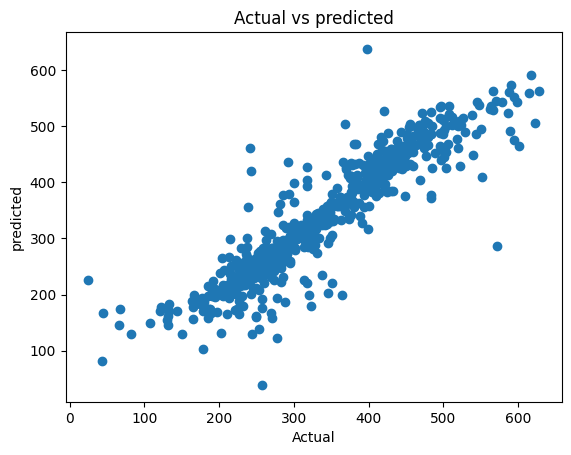

In [124]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model5.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [125]:
y_prd=np.squeeze(np.squeeze(model5.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

23/23 [==============================] - 0s 11ms/step


,Actual,predict,differences
898,259,271.241974,-12.241974
182,187,174.501083,12.498917
565,233,223.484940,9.515060
457,213,207.216324,5.783676
1852,601,465.391022,135.608978
568,243,237.911621,5.088379
1340,477,447.036865,29.963135
778,207,243.598587,-36.598587
562,231,230.412476,0.587524
716,243,257.716064,-14.716064
